In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
import os
from module import Model_Training
import logging
tf.get_logger().setLevel(logging.ERROR)


2023-03-30 15:50:25.572241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-30 15:50:26.837581: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/include:/usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64::/usr/local/cuda/extras/CUPTI/lib64:/home/jj/miniconda3/envs/tf/lib/
2023-03-30 15:50:26.837668: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LI

In [2]:
# full_img_path = '/mnt/d/Datasets/INbreast_COSINE/full/'
roi_img_path = '/mnt/d/Datasets/INbreast/ROI/CLAHE_multi_ROI/'
img_height =224
img_width = 224
batch_size = 4
os.environ['TF_ENABLE_GPU_GARBAGE_COLLECTION'] = 'false'
misclassified_store = '/mnt/c/Users/user/Desktop/INbreast_COSINE_misclassified/'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'train/',
  label_mode="categorical",
  class_names=['benign','malignant'],
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'val/',
  label_mode="categorical",
  class_names=['benign','malignant'],
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)
train = train_ds.prefetch(AUTOTUNE)
val = val_ds.prefetch(AUTOTUNE)
class_weight = {0:1,1:2}

Found 307 files belonging to 2 classes.
Found 79 files belonging to 2 classes.


In [4]:
test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'test/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  class_names=['benign','malignant'],
  shuffle=False,
  batch_size=batch_size)
train_test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'train/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  class_names=['benign','malignant'],
  shuffle=False,
  batch_size=batch_size)
val_test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'val/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  class_names=['benign','malignant'],
  shuffle=False,
  batch_size=batch_size)
# test = test_ds.prefetch(AUTOTUNE)

Found 98 files belonging to 2 classes.
Found 307 files belonging to 2 classes.
Found 79 files belonging to 2 classes.


In [5]:
class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = tf.keras.backend.get_value(self.model.optimizer.lr)
        print(
            f' Epoch {epoch}: accuracy={logs["categorical_accuracy"]:.4f}, loss={logs["loss"]:.4f}, '+
            f'val_accuracy={logs["val_categorical_accuracy"]:.4f}, val_loss={logs["val_loss"]:.4f}, '+
            f' - lr={lr:.7f}')
Model_Training = Model_Training()

# Inception V3

In [6]:
train_log = '/home/jj/FYP/log/InceptionV3_INbreast_no_aug/'
weight = '/home/jj/FYP/Checkpoint/InceptionV3_INbreast_no_aug/'


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['sequential[0][0]']             
                                                                                                  
 tf.math.subtract (TFOpLambda)  (None, 224, 224, 3)  0           ['tf.math.truediv[0][0]']    

2023-03-30 04:06:25.230128: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-30 04:06:27.956030: W tensorflow/tsl/framework/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.
2023-03-30 04:06:28.116990: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-30 04:06:28.133453: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f92c8029c40 initialized for platform CUDA (this does not guarantee

77/77 [==============================] - 14s 71ms/step - loss: 101.4923 - categorical_accuracy: 0.6743 - recall: 0.8685 - recall_1: 0.2340 - val_loss: 99.3088 - val_categorical_accuracy: 0.6962 - val_recall: 0.7593 - val_recall_1: 0.5600
Epoch 2/2
77/77 [==============================] - 4s 55ms/step - loss: 70.5360 - categorical_accuracy: 0.6678 - recall: 0.7089 - recall_1: 0.5745 - val_loss: 47.1325 - val_categorical_accuracy: 0.7089 - val_recall: 0.9815 - val_recall_1: 0.1200
Epoch 3/3
77/77 [==============================] - 5s 58ms/step - loss: 25.4868 - categorical_accuracy: 0.6906 - recall: 0.7089 - recall_1: 0.6489 - val_loss: 11.3684 - val_categorical_accuracy: 0.6962 - val_recall: 0.6667 - val_recall_1: 0.7600
Epoch 4/4
77/77 [==============================] - 4s 55ms/step - loss: 5.4447 - categorical_accuracy: 0.7329 - recall: 0.7606 - recall_1: 0.6702 - val_loss: 2.1192 - val_categorical_accuracy: 0.7089 - val_recall: 0.6296 - val_recall_1: 0.8800
Epoch 5/5
77/77 [=========

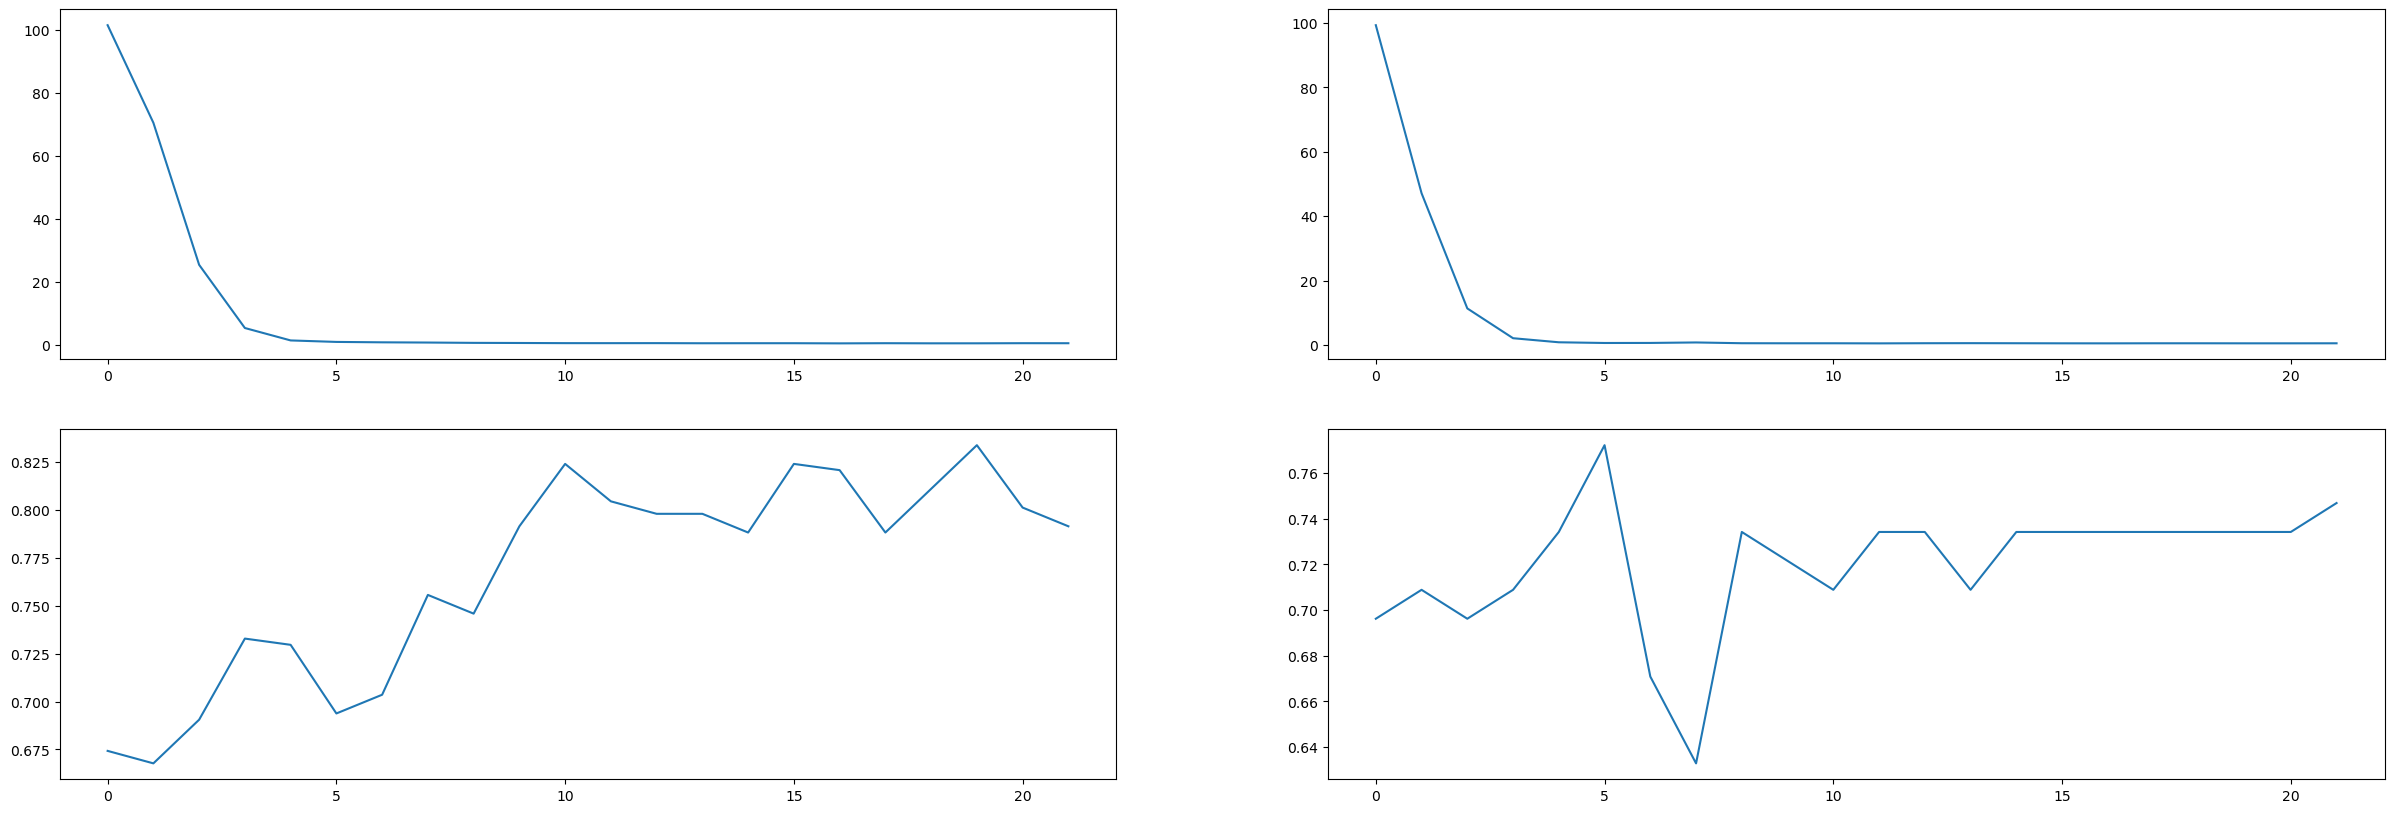

In [7]:
tf.keras.backend.clear_session()
model, inception_dense_history = Model_Training.main(    
    'inceptionv3',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    flatten='global_average_pooling',
    trainable_layers = False,
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log=train_log+'dense.csv',
    load_weights = False,
    save_weights = weight+'Dense/best_model',
    learning_rate=1e-3,init_lr=1e-5,min_lr=1e-6,
    warmup=5,cosine=10,class_weight=class_weight,
    optimiser=tf.keras.optimizers.Adam(),
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

## Fine Tune

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['sequential[0][0]']             
                                                                                                  
 tf.math.subtract (TFOpLambda)  (None, 224, 224, 3)  0           ['tf.math.truediv[0][0]']    

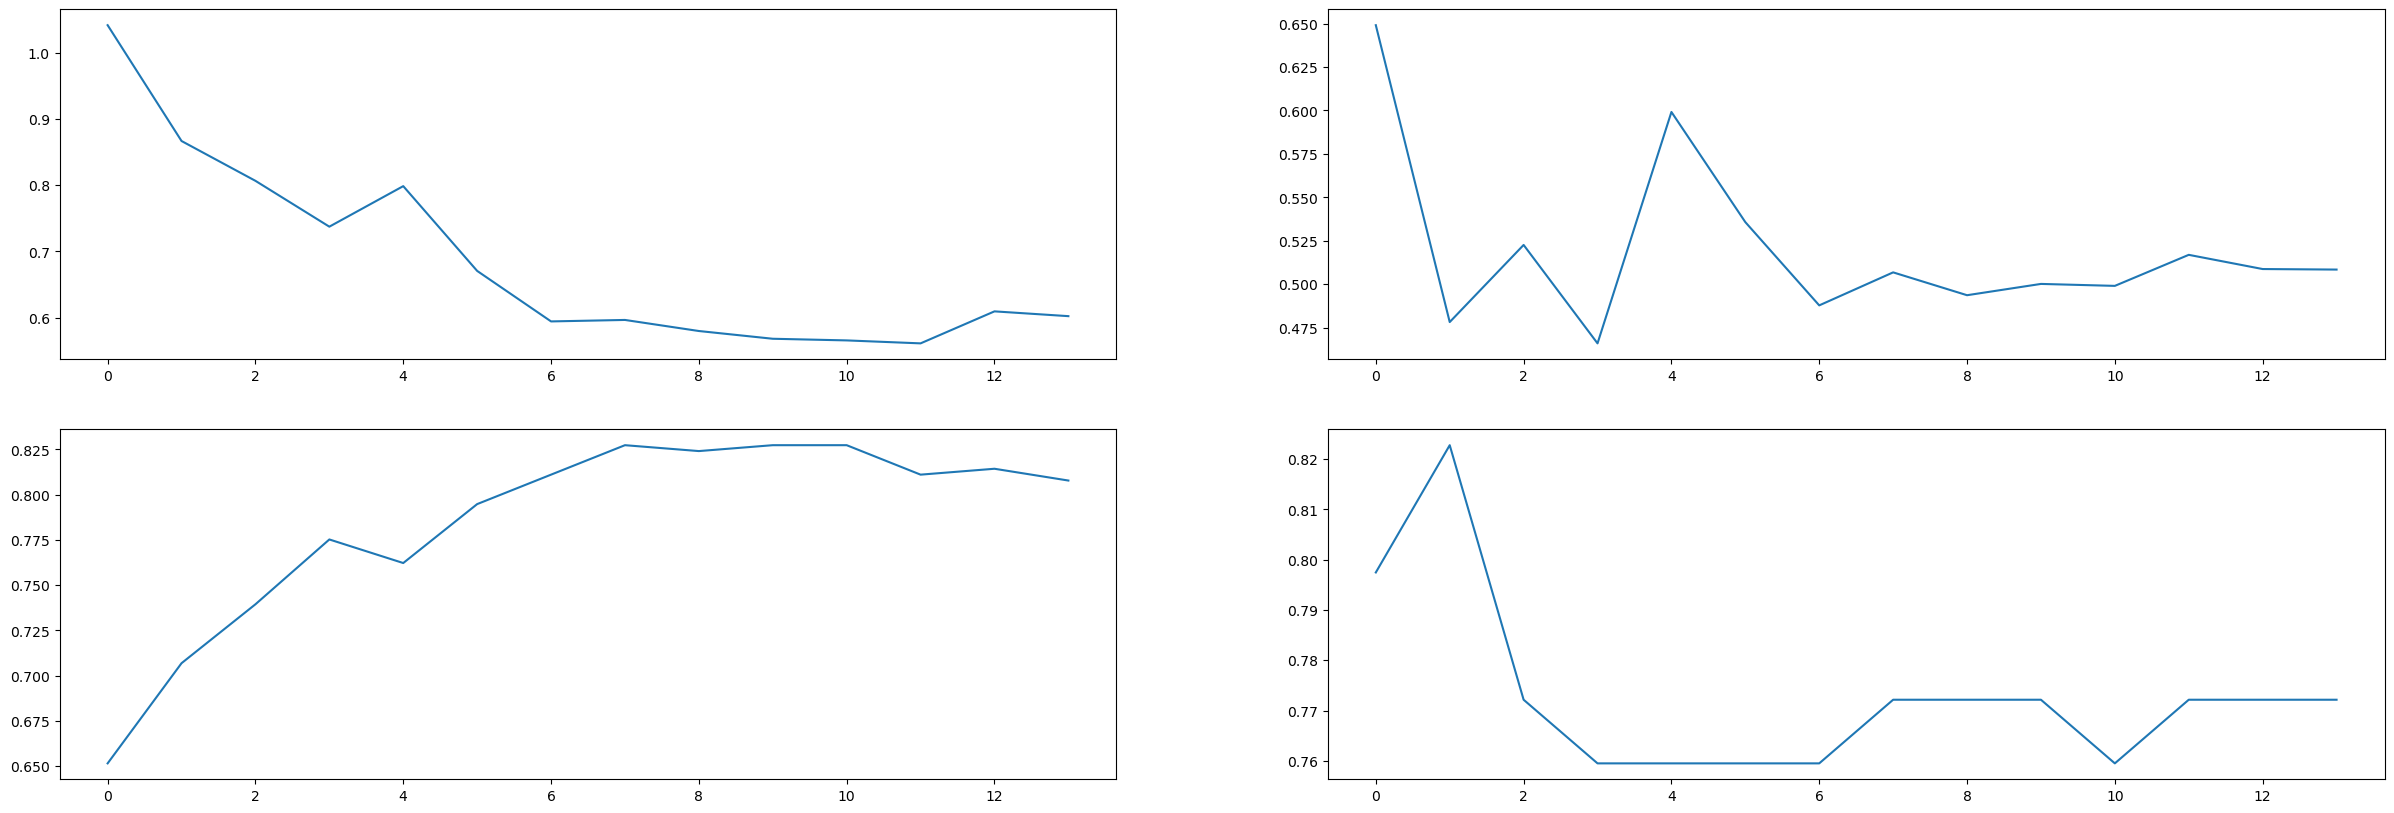

In [8]:
tf.keras.backend.clear_session()
model, inception_fine_tune_history = Model_Training.main(    
    'inceptionv3',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    flatten='global_average_pooling',
    trainable_layers = 63,
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log=train_log+'Fine_Tune.csv',
    load_weights = weight+'Dense/best_model',
    save_weights = weight+'Fine_Tune/best_model',
    learning_rate=1e-4,init_lr=1e-6,warmup=0,cosine=25, min_lr=1e-6,class_weight=class_weight,                                                                                                                                                                                                                                                                                                                                                                                                                                  
    optimiser=tf.keras.optimizers.Adam(),
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

model.save_weights(weight+'Final/Final')

## Test

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 tf.math.subtract (TFOpLambda)  (None, 224, 224, 3)  0           ['tf.math.truediv[0][0]']        
                                                                                                  
 inception_v3 (Functional)      (None, 5, 5, 2048)   21802784    ['tf.math.subtract[0][0]']   

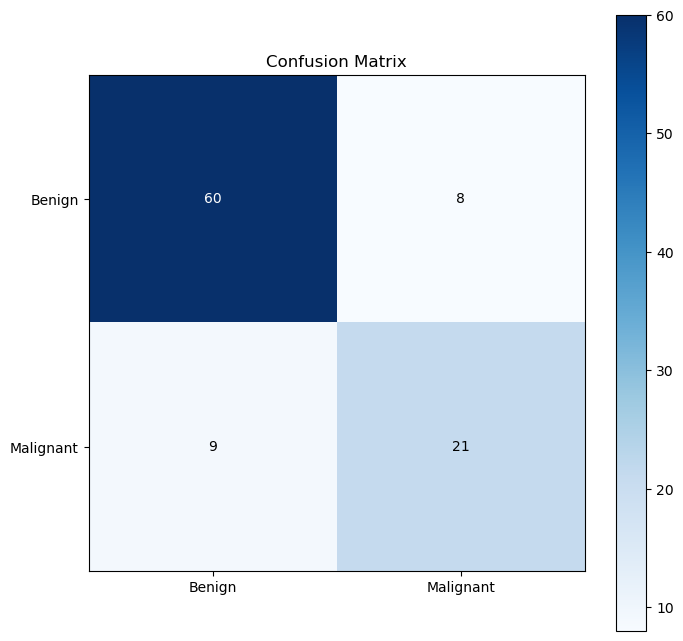

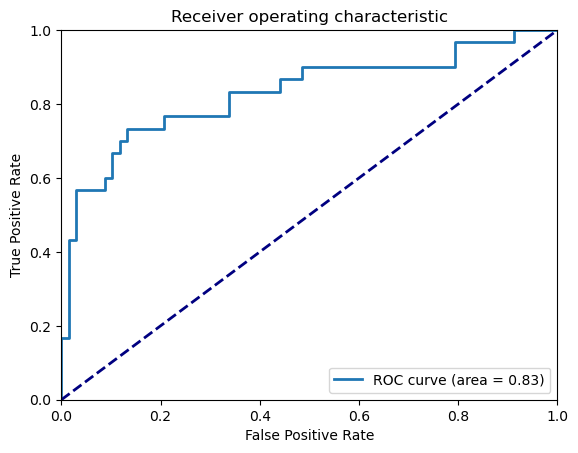

In [9]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]

model = Model_Training.build_model('inceptionv3',augmentation=False,flatten='global_average_pooling',load_weights=weight+'Fine_Tune/best_model',metrics=metric,img_width=img_width,img_height=img_height)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
tf.keras.backend.clear_session()

In [10]:
# store_misclassified = misclassified_store+'inceptionv3/'
# model.evaluate(test)
# misclassified_inceptionv3_test = Model_Training.store_misclassified(model,test,store_misclassified+'test/')
# misclassified_inceptionv3_train = Model_Training.store_misclassified(model,train_test,store_misclassified+'train/')
# misclassified_inceptionv3_val = Model_Training.store_misclassified(model,val_test,store_misclassified+'val/')

# FT2

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['sequential[0][0]']             
                                                                                                  
 tf.math.subtract (TFOpLambda)  (None, 224, 224, 3)  0           ['tf.math.truediv[0][0]']    

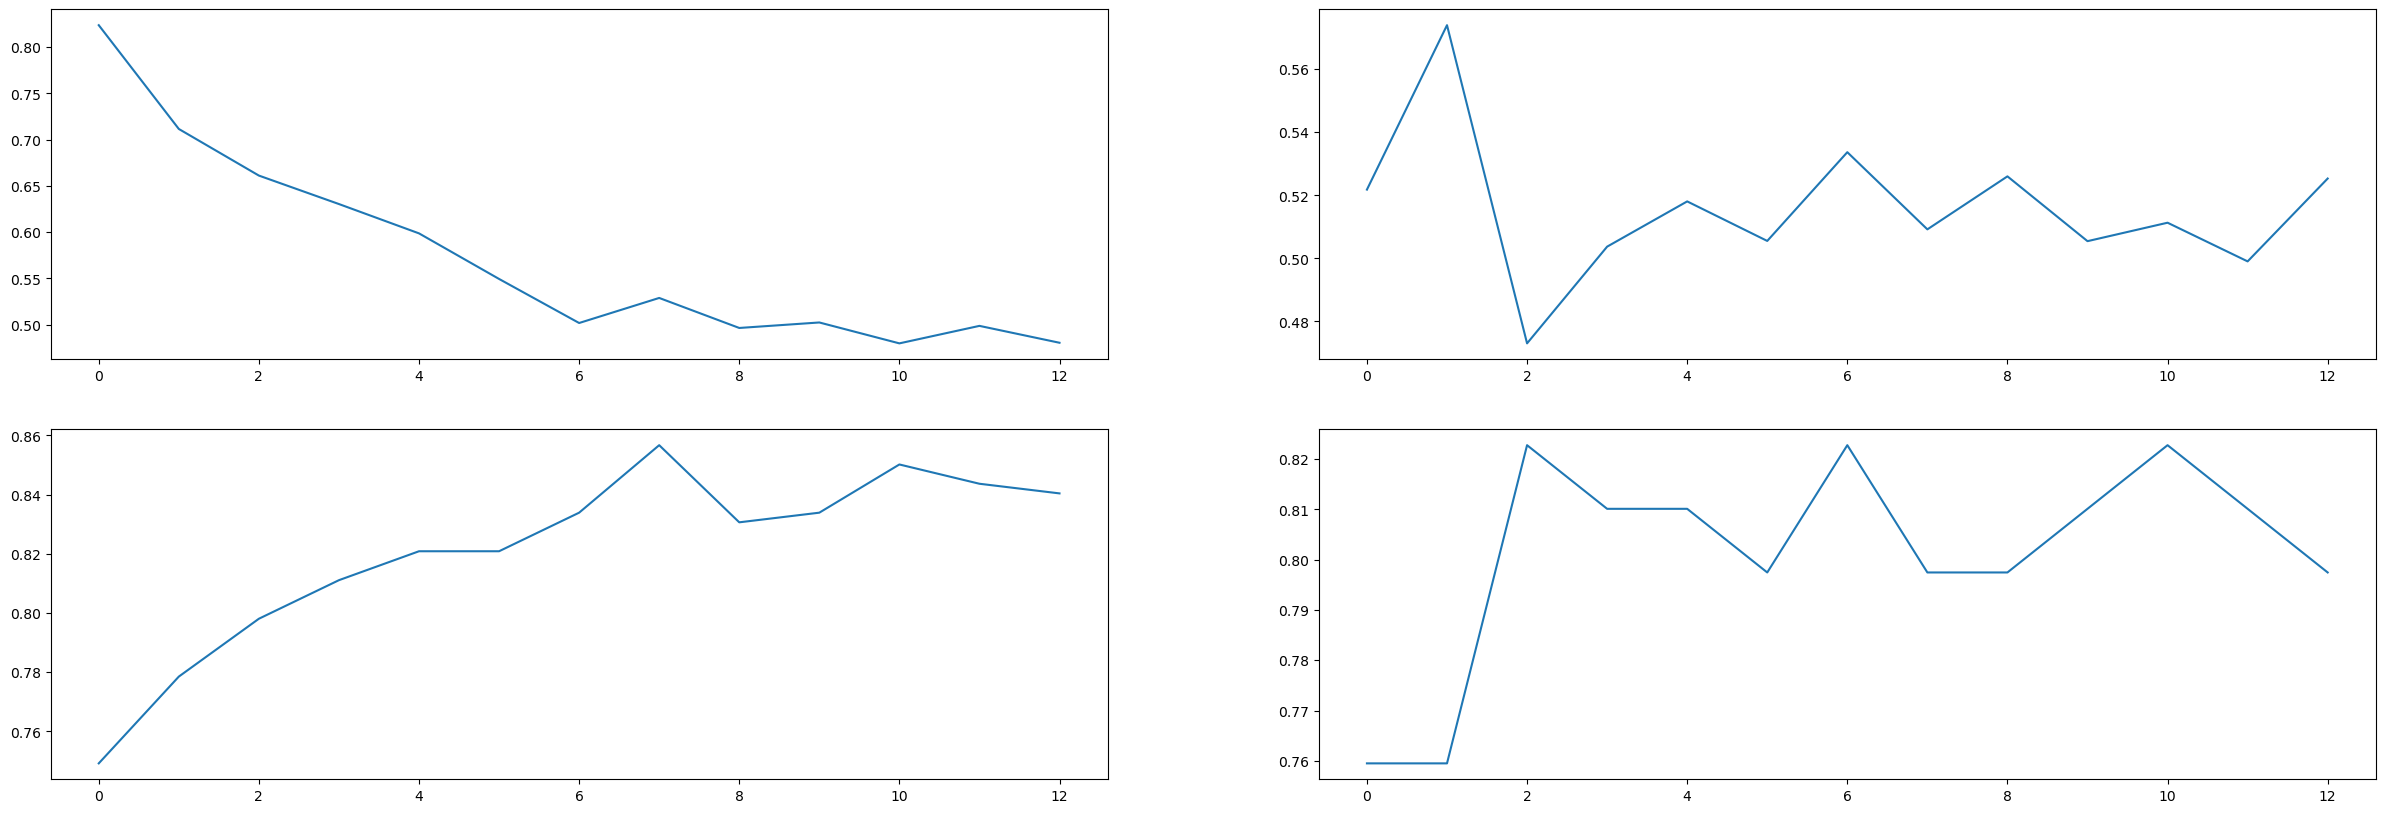

In [11]:
tf.keras.backend.clear_session()
model, inception_fine_tune_history = Model_Training.main(    
    'inceptionv3',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    flatten='global_average_pooling',
    trainable_layers = -1,
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log=train_log+'Fine_Tune.csv',
    load_weights = weight+'Fine_Tune/best_model',
    save_weights = weight+'Fine_Tune_2/best_model',
    learning_rate=1e-5,init_lr=1e-6,warmup=0,cosine=25, min_lr=1e-7,class_weight=class_weight,                                                                                                                                                                                                                                                                                                                                                                                                                                  
    optimiser=tf.keras.optimizers.Adam(),
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

model.save_weights(weight+'Final_2/Final_2')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 tf.math.subtract (TFOpLambda)  (None, 224, 224, 3)  0           ['tf.math.truediv[0][0]']        
                                                                                                  
 inception_v3 (Functional)      (None, 5, 5, 2048)   21802784    ['tf.math.subtract[0][0]']   

2023-03-30 15:15:36.214495: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


 1/25 [>.............................] - ETA: 1:34 - loss: 0.0638 - categorical_accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 1.0000

2023-03-30 15:15:37.984258: W tensorflow/tsl/framework/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.
2023-03-30 15:15:38.144593: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


25/25 [==============================] - 1s 16ms/step


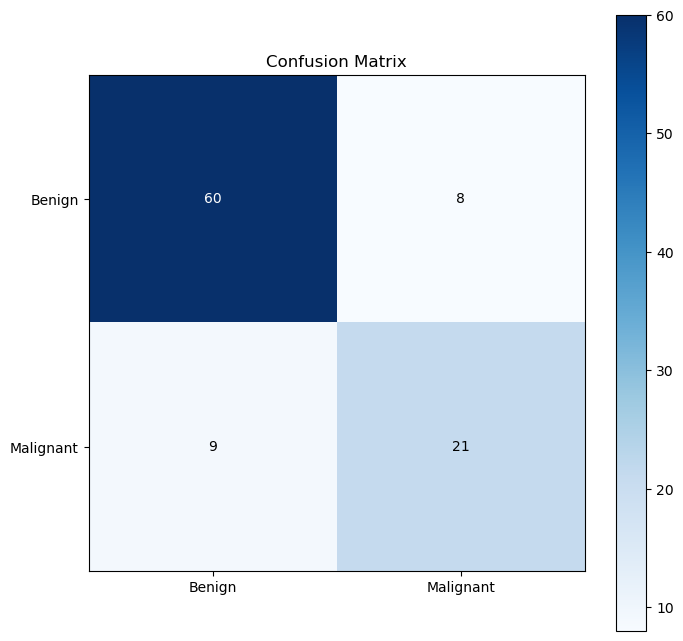

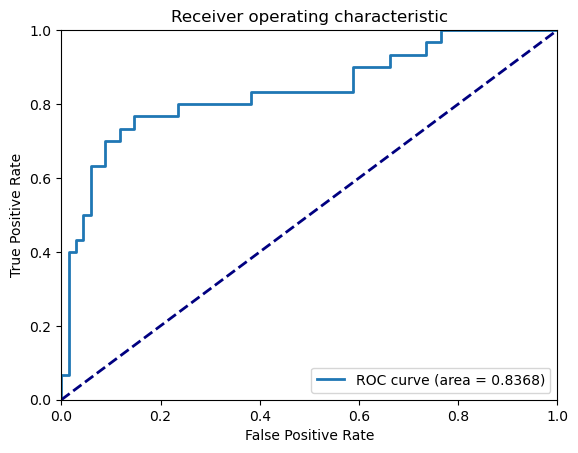

In [7]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('inceptionv3',augmentation=False,flatten='global_average_pooling',load_weights=weight+'Final_2/Final_2',metrics=metric,img_width=img_width,img_height=img_height)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)

5/5 [==============================] - 1s 32ms/step - loss: 0.2830 - categorical_accuracy: 0.8333 - precision: 0.6786 - recall: 0.8636 - auc: 0.9533  

5/5 [==============================] - 1s 42ms/step - loss: 0.2247 - categorical_accuracy: 0.8889 - precision: 0.8500 - recall: 0.7727 - auc: 0.9620  1024,128,128

5/5 [==============================] - 2s 51ms/step - loss: 0.2361 - categorical_accuracy: 0.8750 - precision: 0.7241 - recall: 0.9545 - auc: 0.9626  1024,512,128, finetune = SGD
Adam tends to overfit while SGD has the tendency to occilate at the training loss

5/5 [==============================] - 1s 34ms/step - loss: 0.6124 - categorical_accuracy: 0.9028 - precision: 0.7586 - recall: 1.0000 - auc: 0.9587  Fine Tune all with Adam

5/5 [==============================] - 1s 51ms/step - loss: 0.5944 - categorical_accuracy: 0.8750 - precision: 0.7600 - recall: 0.8636 - auc: 0.9491  1024,512,128 GAP

'/home/jj/FYP/Checkpoint/InceptionV3_INbreast_COSINE/' 5/5 [==============================] - 1s 30ms/step - loss: 0.4656 - categorical_accuracy: 0.9306 - precision: 0.8400 - recall: 0.9545 - auc: 0.9549  

# Resnet50

## Initialising

In [8]:
weights = '/home/jj/FYP/Checkpoint/Resnet50_INbreast_COSINE/'
train_log = '/home/jj/FYP/log/Resnet50_INbreast_COSINE/'

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 224, 224, 3)  0          ['sequential[0][0]']             
 ingOpLambda)                                                                                     
                                                                                              

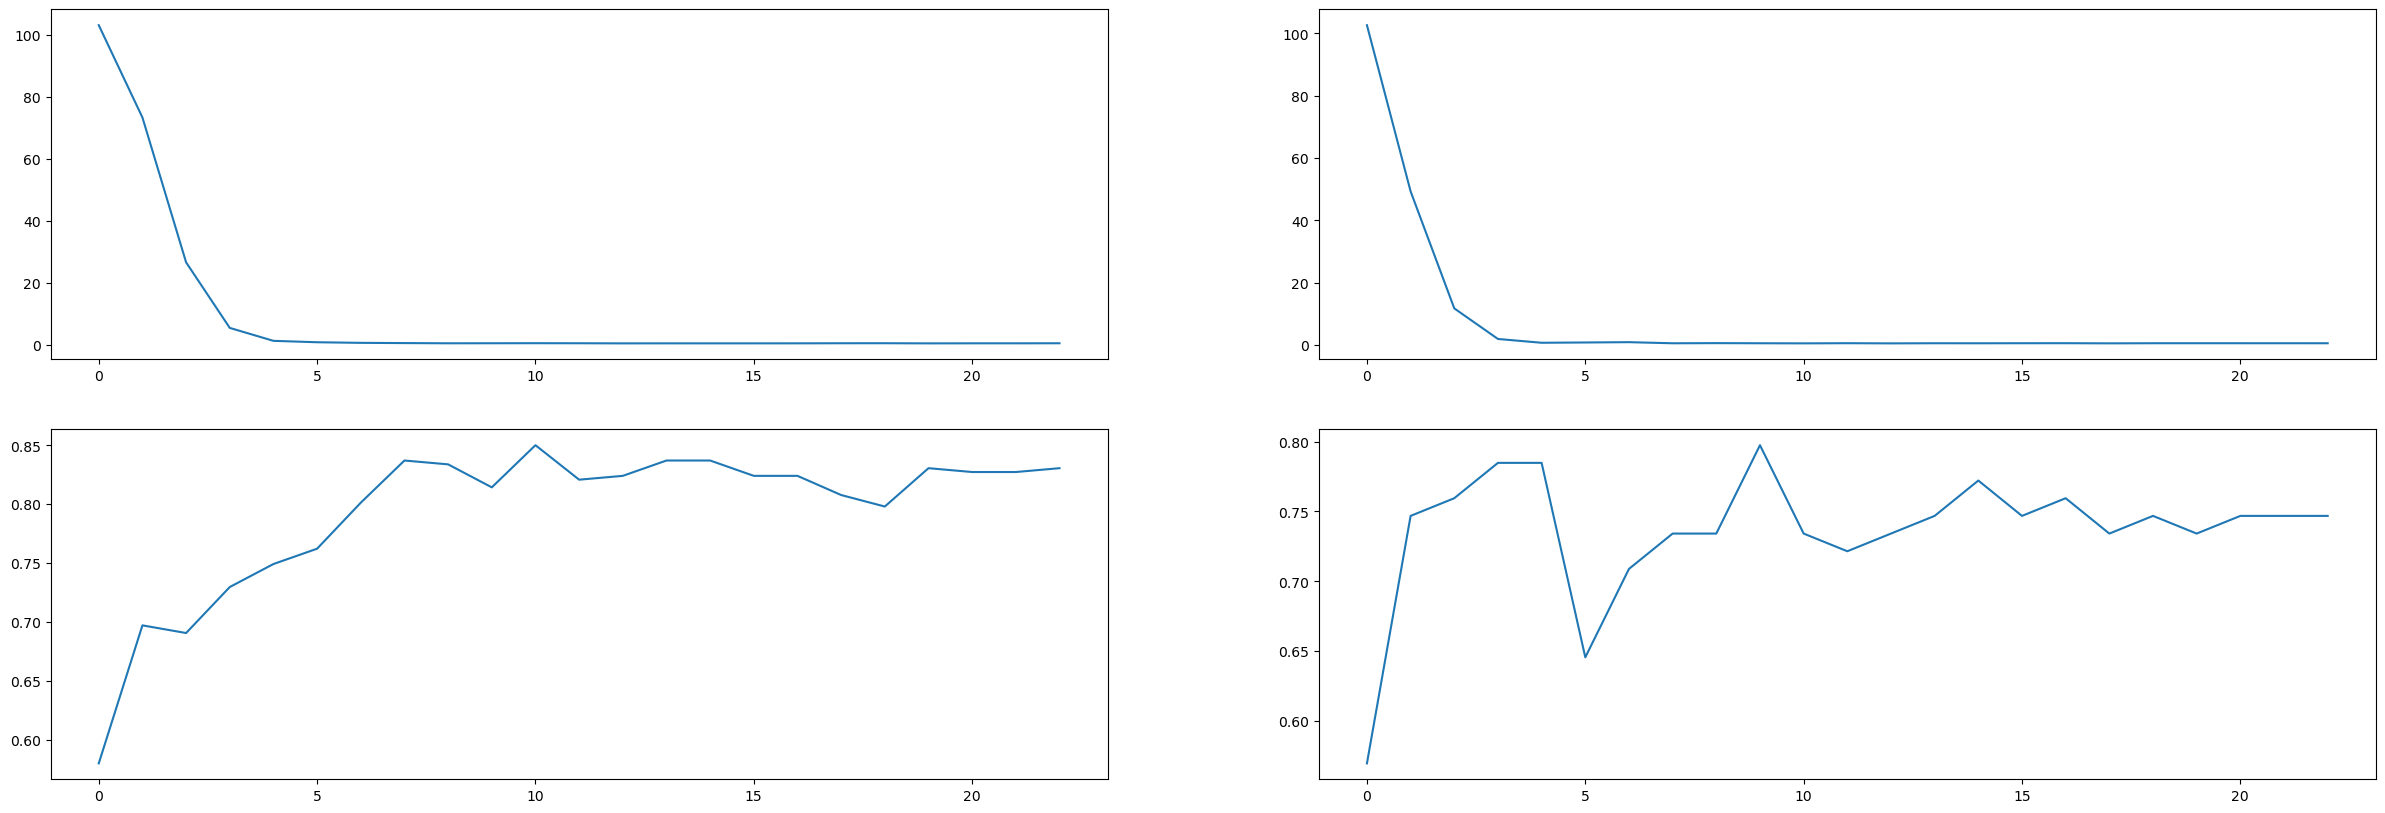

In [14]:
tf.keras.backend.clear_session()
model, resnet_dense_history = Model_Training.main(    
    'resnet50',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,flatten='global_average_pooling',
    augmentation = True,
    trainable_layers = False,
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'dense.csv',
    load_weights = False,
    save_weights = weights+'Dense/best_model',
    learning_rate=1e-3,init_lr=1e-6,warmup=5,cosine=20,min_lr=1e-6,
    optimiser=tf.keras.optimizers.Adam(),class_weight=class_weight,
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 224, 224, 3)  0          ['input_2[0][0]']                
 ingOpLambda)                                                                                     
                                                                                                  
 tf.nn.bias_add (TFOpLambda)    (None, 224, 224, 3)  0           ['tf.__operators__.getitem[0][0]'
                                                                 ]                            

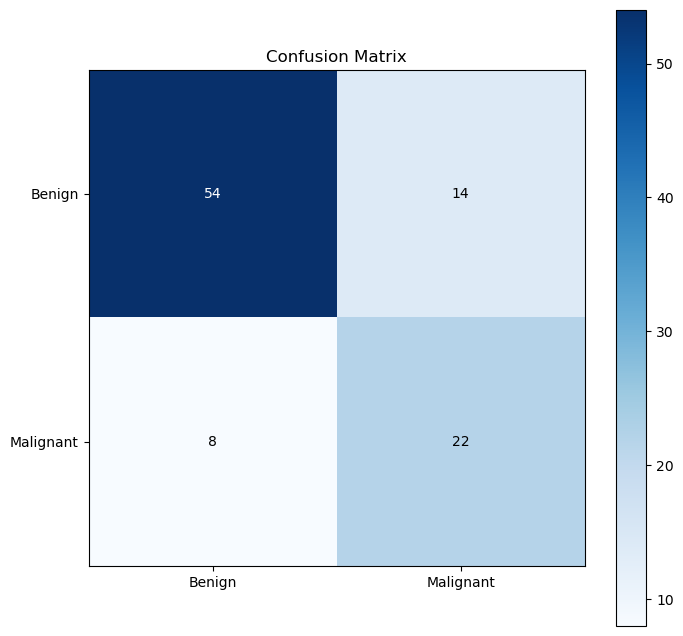

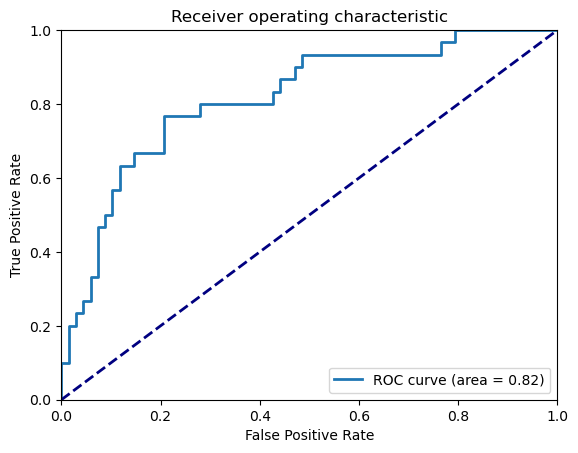

In [15]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('resnet50',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Dense/best_model',metrics=metric,img_width=img_width,img_height=img_height)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)

## Fine Tune

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 224, 224, 3)  0          ['sequential[0][0]']             
 ingOpLambda)                                                                                     
                                                                                              

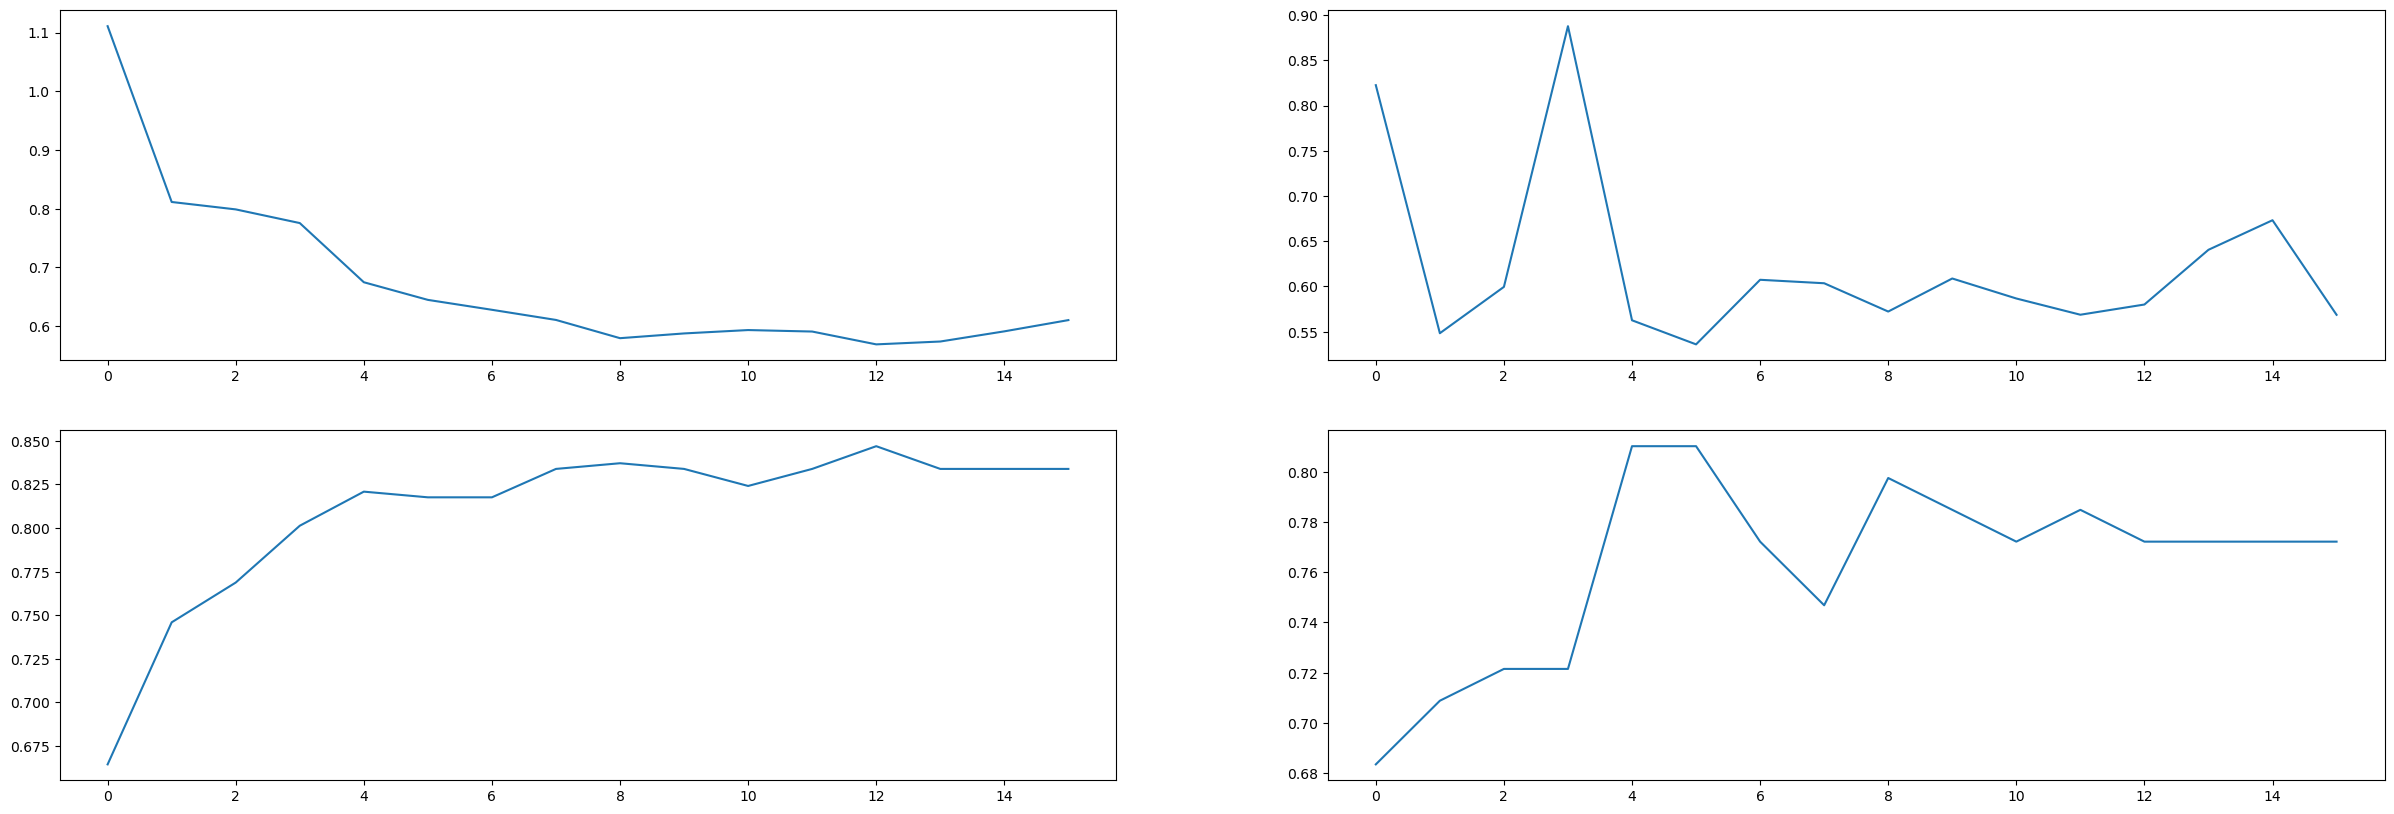

In [16]:
tf.keras.backend.clear_session()
model, resnet_fine_tune_history = Model_Training.main(    
    'resnet50',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    trainable_layers = 22,flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'Fine_Tune.csv',
    load_weights = weights+'Dense/best_model',
    save_weights = weights+'Fine_Tune/best_model',
    learning_rate=1e-4,init_lr=1e-6,warmup=0,cosine=40,
    optimiser=tf.keras.optimizers.Adam(),class_weight=class_weight,
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)
model.save_weights(weights+'Final/Final')

## Test

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 224, 224, 3)  0          ['input_2[0][0]']                
 ingOpLambda)                                                                                     
                                                                                                  
 tf.nn.bias_add (TFOpLambda)    (None, 224, 224, 3)  0           ['tf.__operators__.getitem[0][0]'
                                                                 ]                            

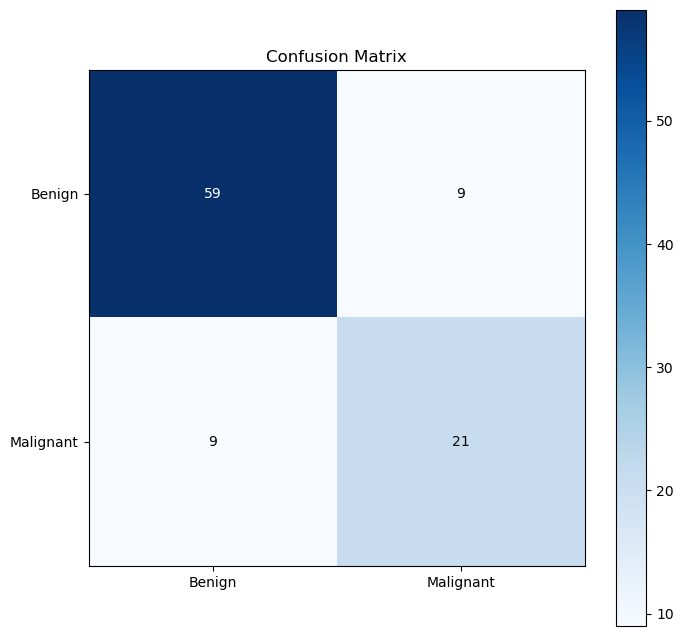

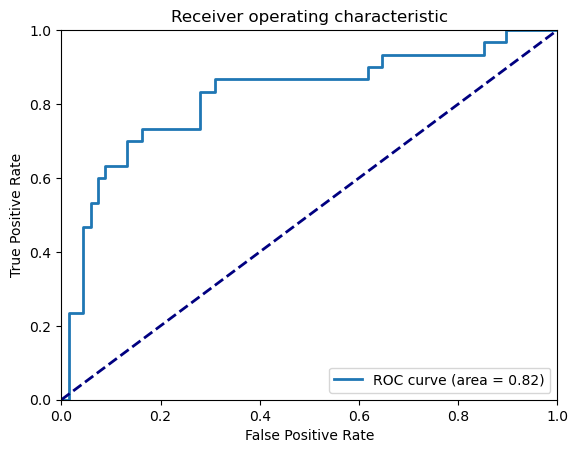

In [17]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('resnet50',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Fine_Tune/best_model',metrics=metric,img_width=img_width,img_height=img_height)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)

## FT2

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 224, 224, 3)  0          ['sequential[0][0]']             
 ingOpLambda)                                                                                     
                                                                                              

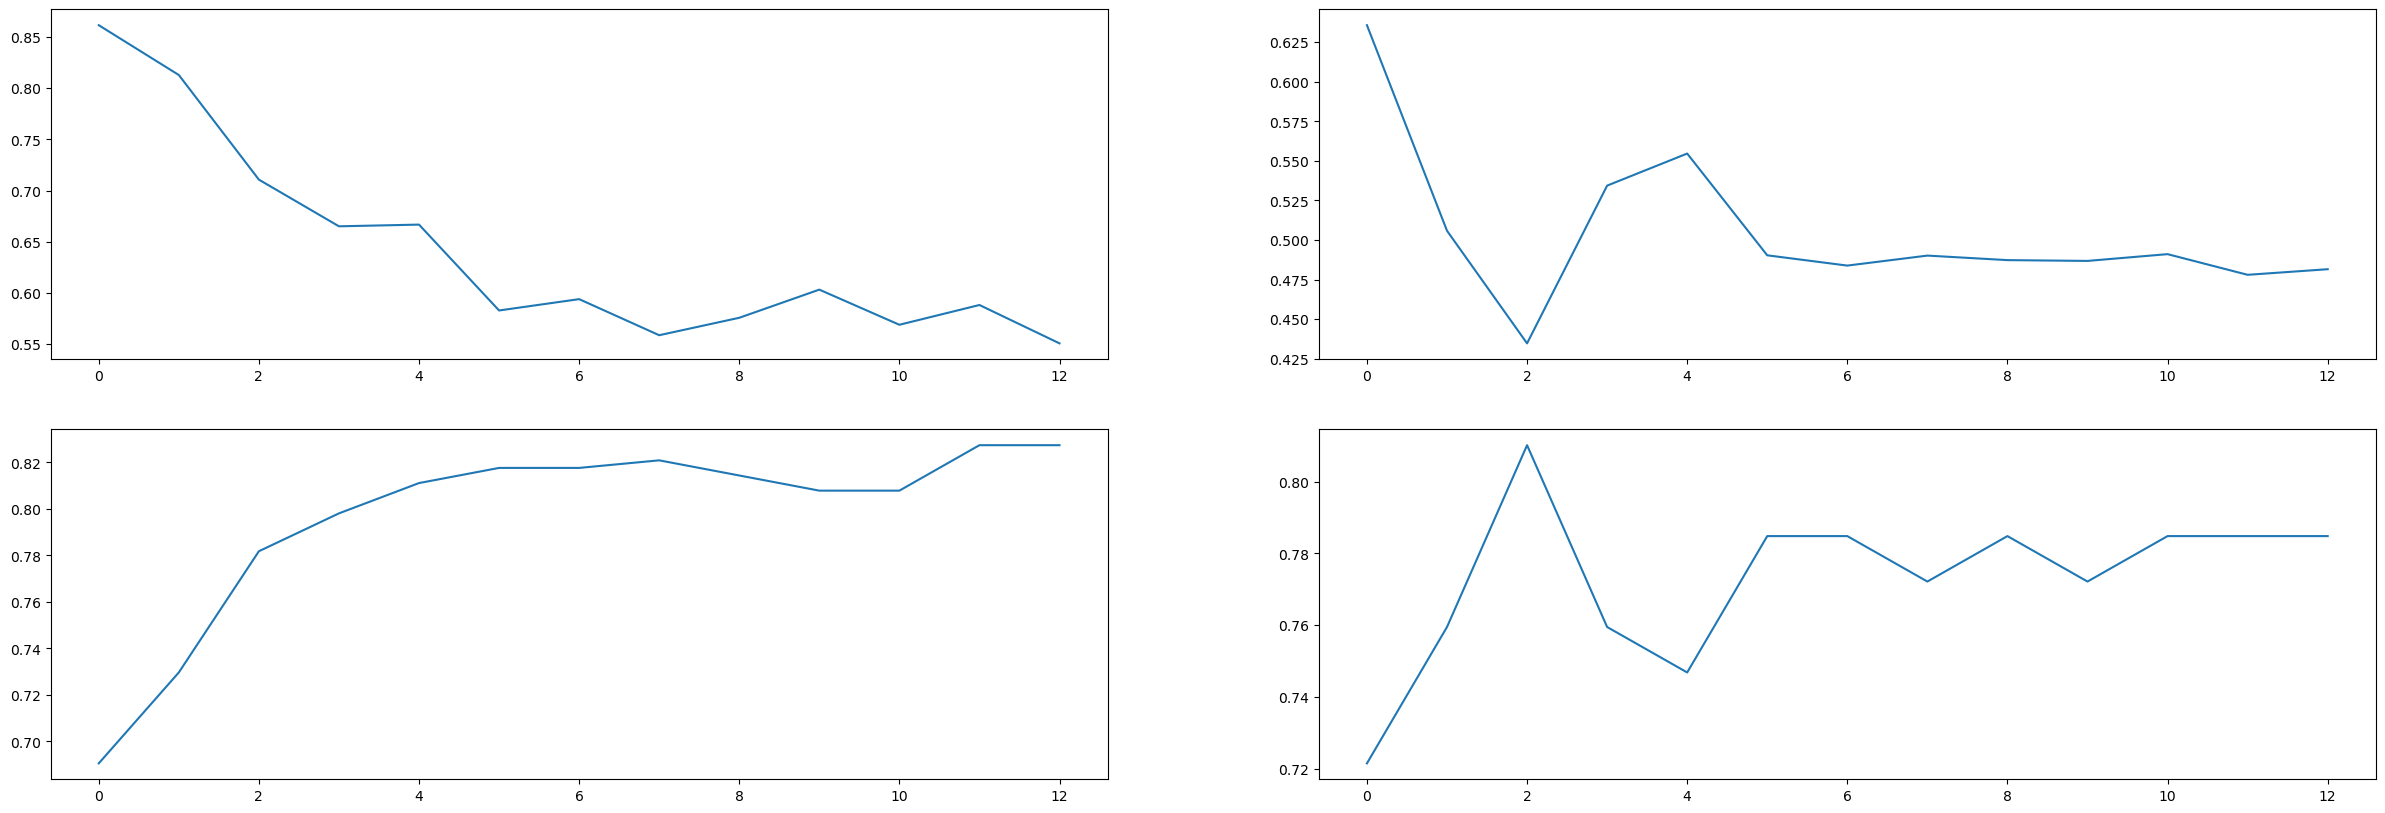

In [18]:
tf.keras.backend.clear_session()
model, resnet_fine_tune_history = Model_Training.main(    
    'resnet50',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    trainable_layers = -1,flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'Fine_Tune.csv',
    load_weights = weights+'Fine_Tune/best_model',
    save_weights = weights+'Fine_Tune_2/best_model',
    learning_rate=1e-5,init_lr=1e-6,warmup=0,cosine=40,
    optimiser=tf.keras.optimizers.Adam(),class_weight=class_weight,
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)
model.save_weights(weights+'Final_2/Final_2')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 224, 224, 3)  0          ['input_2[0][0]']                
 ingOpLambda)                                                                                     
                                                                                                  
 tf.nn.bias_add (TFOpLambda)    (None, 224, 224, 3)  0           ['tf.__operators__.getitem[0][0]'
                                                                 ]                            

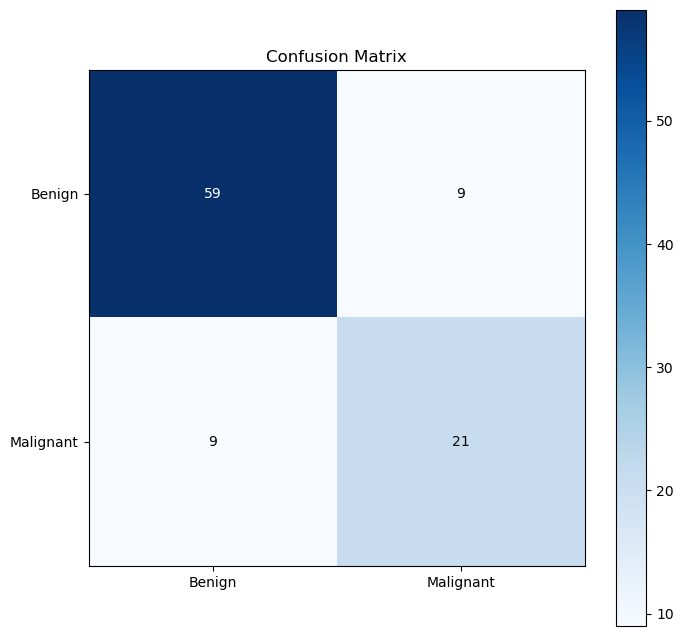

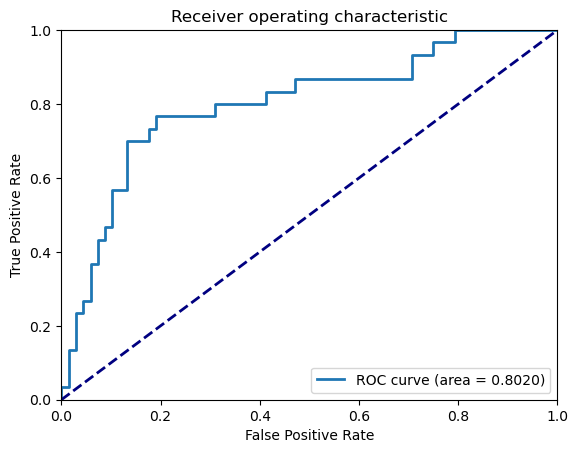

In [9]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('resnet50',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Final_2/Final_2',metrics=metric,img_width=img_width,img_height=img_height)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)


In [20]:
# store_misclassified = misclassified_store+'resnet50/'
# model.evaluate(test)
# misclassified_inceptionv3_test = Model_Training.store_misclassified(model,test,store_misclassified+'test/')
# misclassified_inceptionv3_train = Model_Training.store_misclassified(model,train_test,store_misclassified+'train/')
# misclassified_inceptionv3_val = Model_Training.store_misclassified(model,val_test,store_misclassified+'val/')

# VGG16

In [10]:
weights = '/home/jj/FYP/Checkpoint/Vgg16_INbreast_COSINE/'
train_log = '/home/jj/FYP/log/Vgg16_INbreast_COSINE/'

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 224, 224, 3)  0          ['sequential[0][0]']             
 ingOpLambda)                                                                                     
                                                                                              

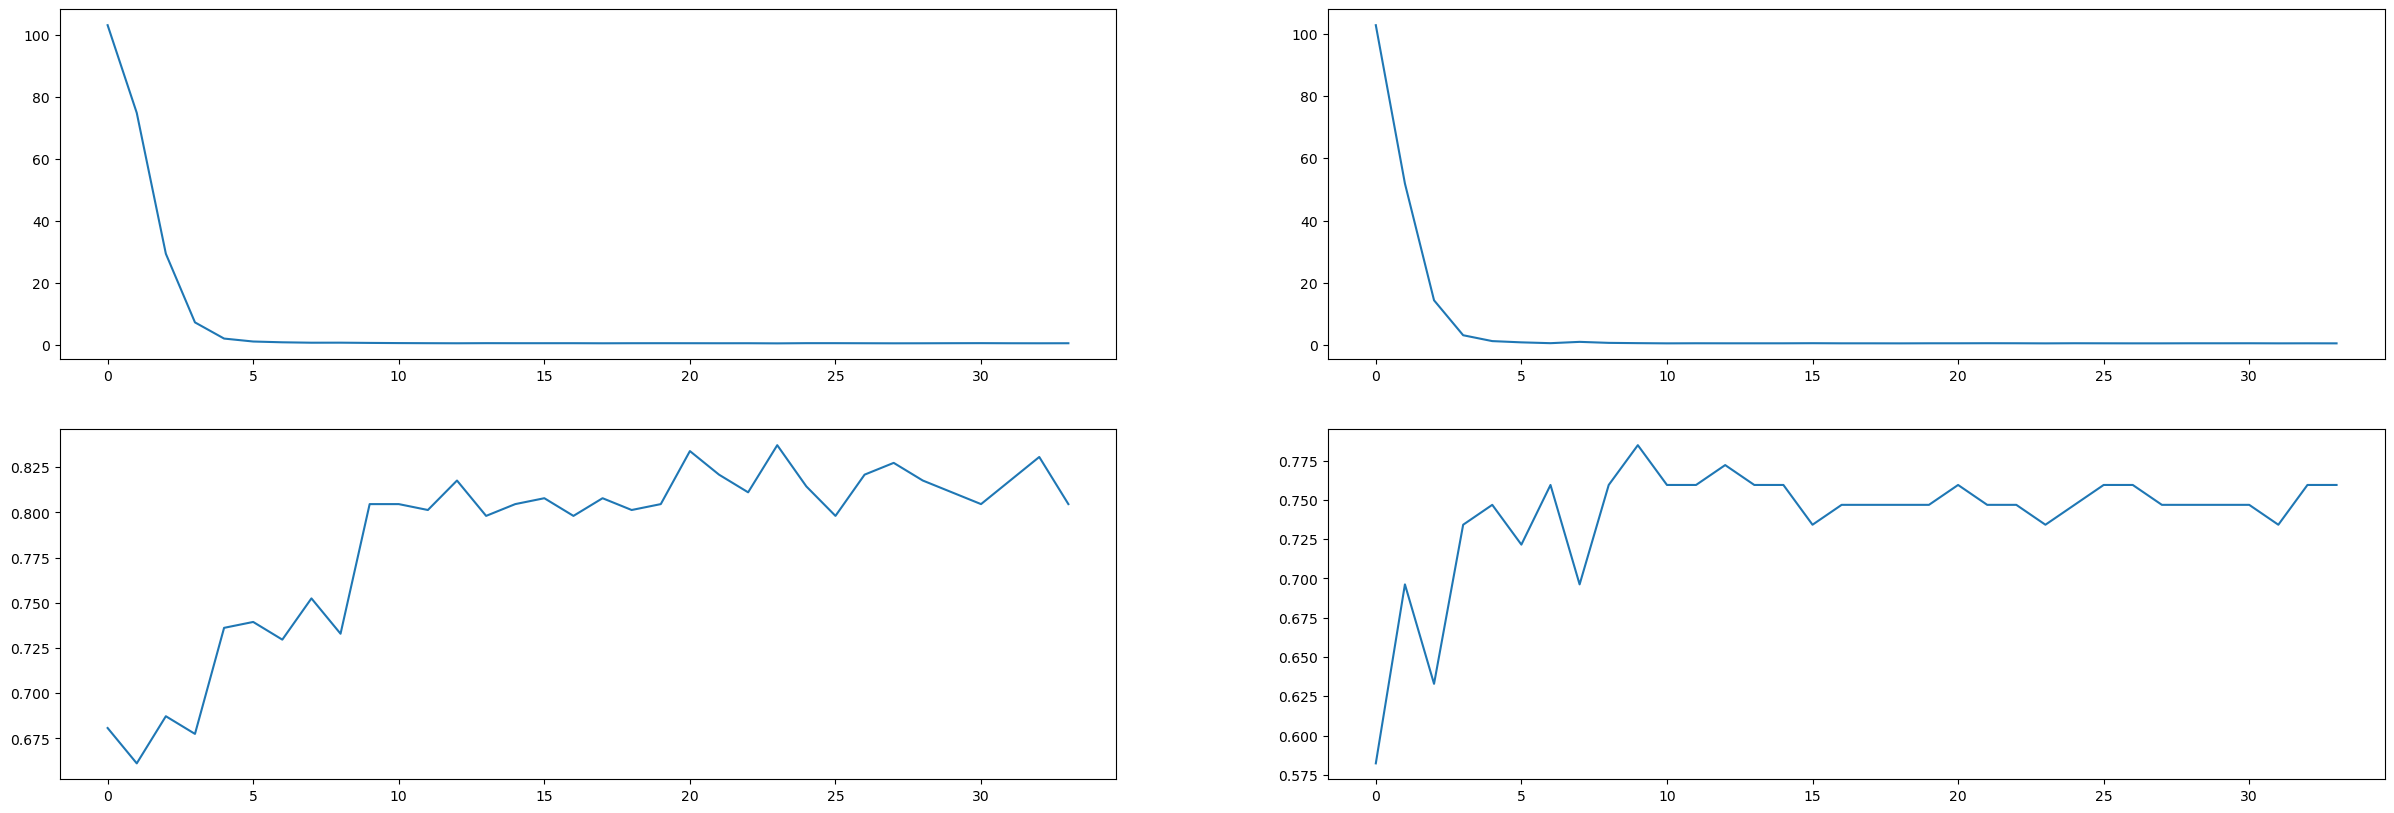

In [22]:
tf.keras.backend.clear_session()
weights = '/home/jj/FYP/Checkpoint/Vgg16_INbreast_COSINE/'
train_log = '/home/jj/FYP/log/Vgg16_INbreast_COSINE/'
model, vgg16_dense_history = Model_Training.main(    
    'vgg16',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    trainable_layers = False,flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'dense.csv',
    load_weights = False,
    save_weights = weights+'Dense/best_model',
    learning_rate=1e-3,init_lr=1e-6,warmup=5,cosine=20,min_lr=1e-6,
    optimiser=tf.keras.optimizers.Adam(),class_weight=class_weight,
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

## Fine Tune

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 224, 224, 3)  0          ['sequential[0][0]']             
 ingOpLambda)                                                                                     
                                                                                              

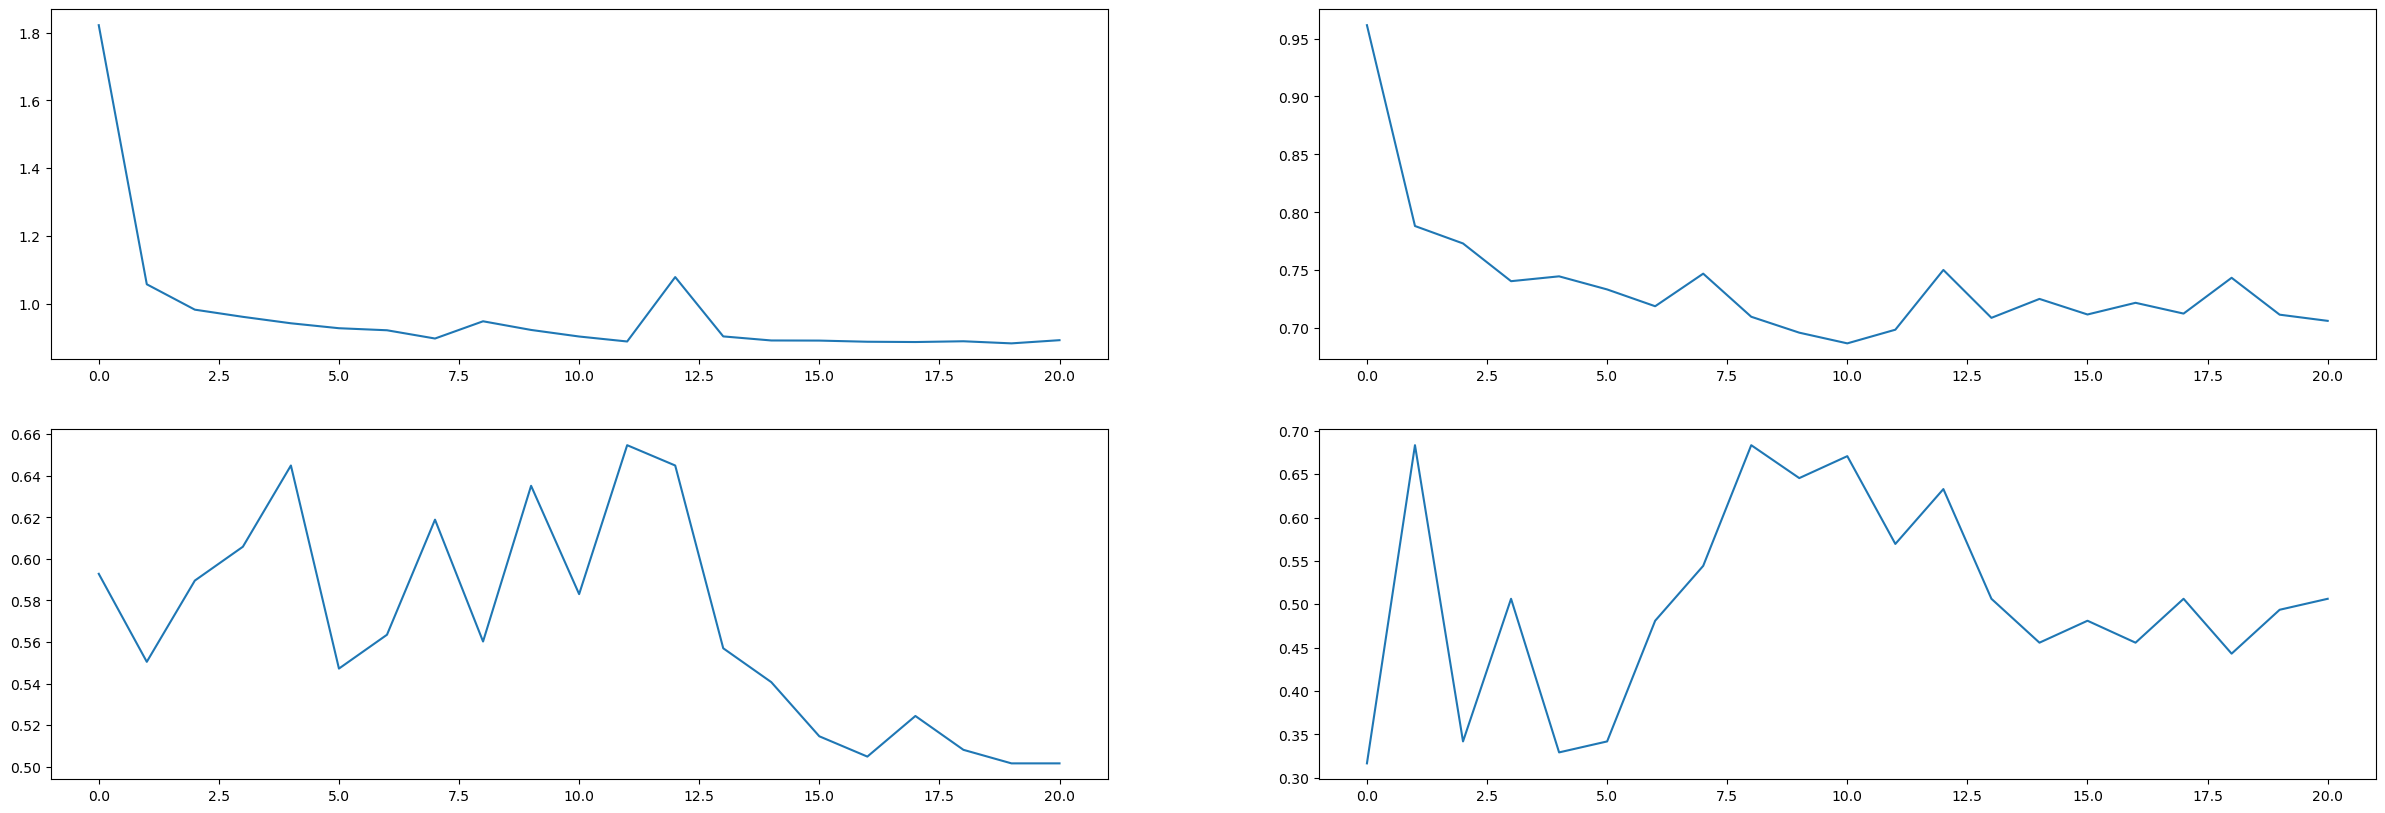

In [23]:
tf.keras.backend.clear_session()
model, vgg16_fine_tune_history = Model_Training.main(    
    'vgg16',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    trainable_layers = 8,flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'Fine_Tune.csv',
    load_weights = weights+'Dense/best_model',
    save_weights = weights+'Fine_Tune/best_model',
    learning_rate=1e-4,init_lr=1e-6,warmup=0,cosine=40,
    optimiser=tf.keras.optimizers.Adam(),class_weight=class_weight,
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)
model.save_weights(weights+'Final/Final')

## Test

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 224, 224, 3)  0          ['input_2[0][0]']                
 ingOpLambda)                                                                                     
                                                                                                  
 tf.nn.bias_add (TFOpLambda)    (None, 224, 224, 3)  0           ['tf.__operators__.getitem[0][0]'
                                                                 ]                            

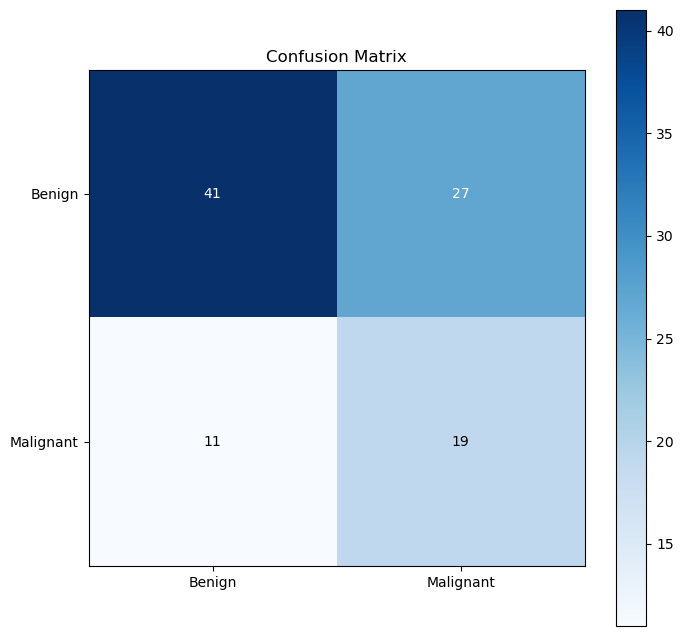

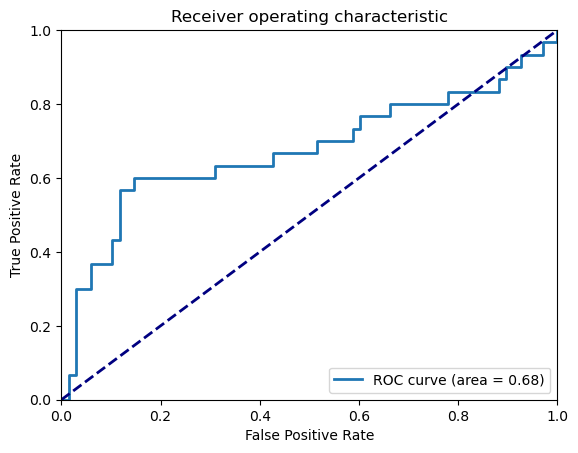

In [24]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('vgg16',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Fine_Tune/best_model',metrics=metric,img_width=img_width,img_height=img_height)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)

## FT2

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 224, 224, 3)  0          ['sequential[0][0]']             
 ingOpLambda)                                                                                     
                                                                                              

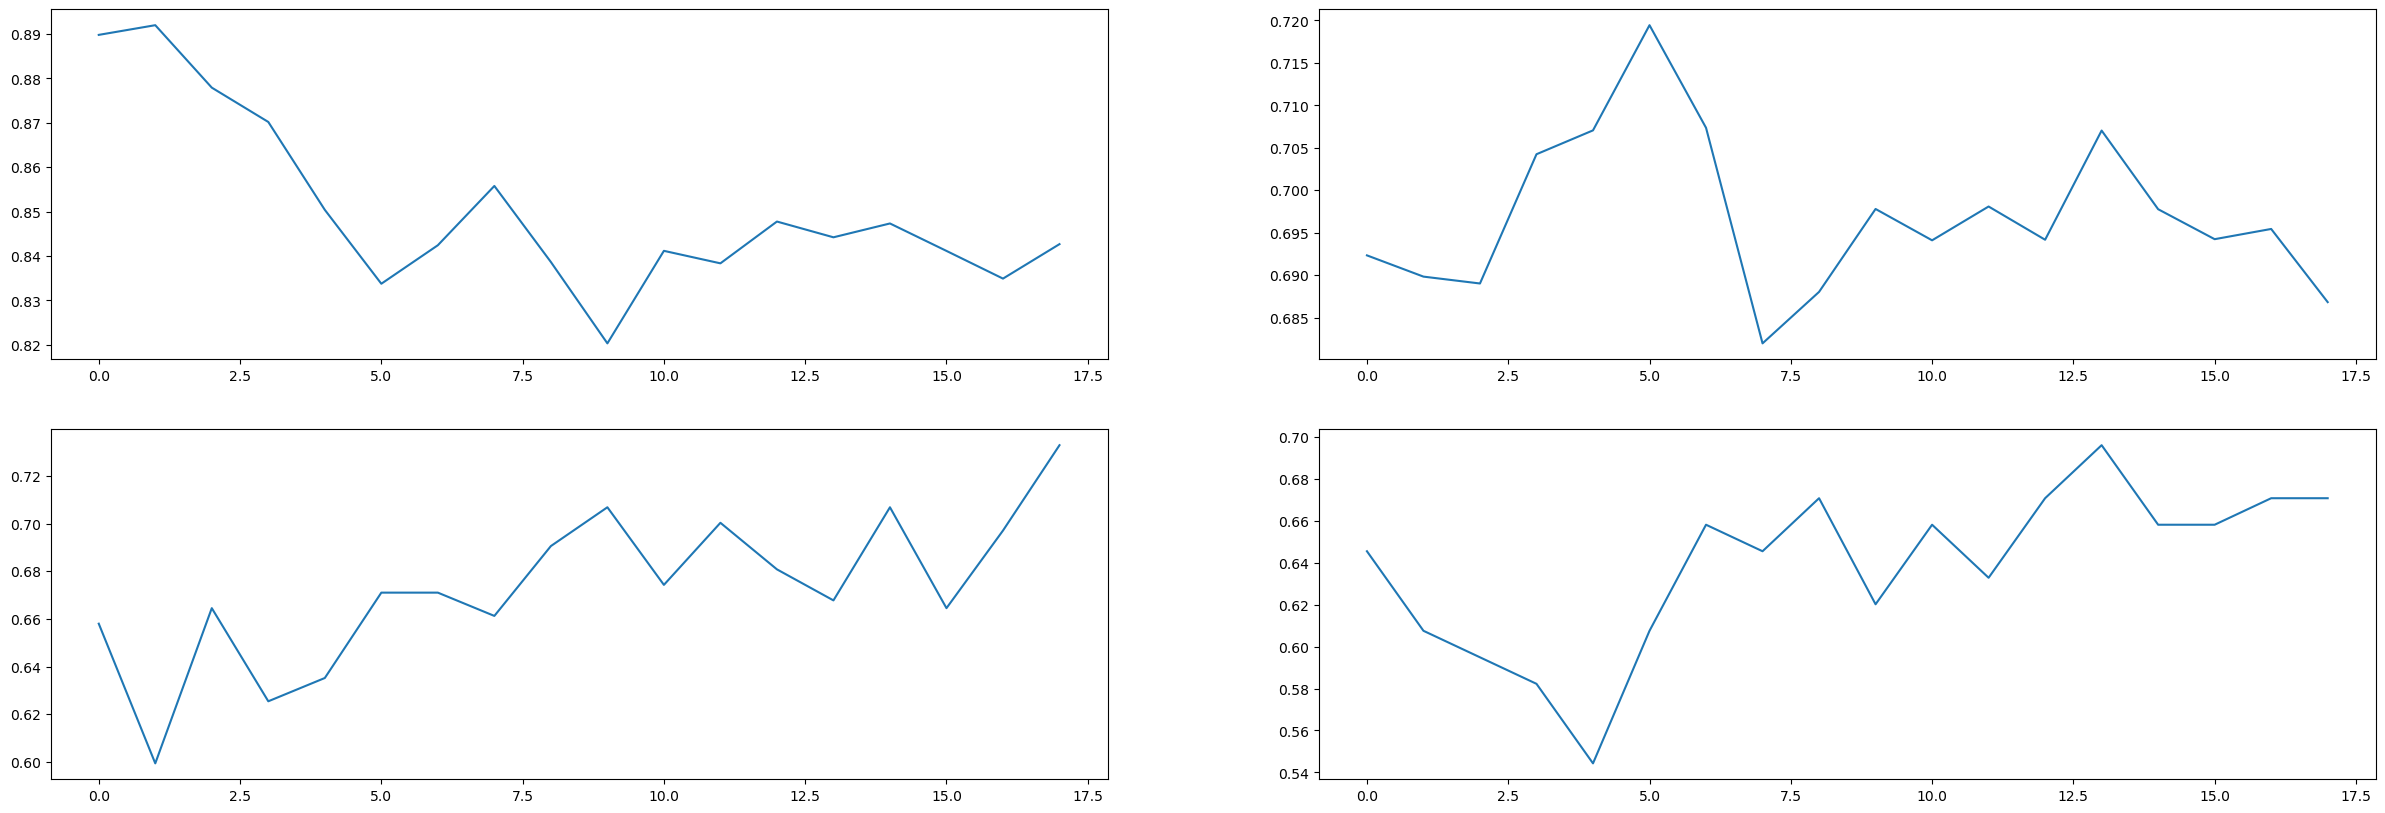

In [25]:
tf.keras.backend.clear_session()
model, vgg16_fine_tune_history = Model_Training.main(    
    'vgg16',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    trainable_layers = 8,flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'Fine_Tune_2.csv',
    load_weights = weights+'Fine_Tune/best_model',
    save_weights = weights+'Fine_Tune_2/best_model',
    learning_rate=1e-5,init_lr=1e-6,warmup=0,cosine=40,
    optimiser=tf.keras.optimizers.Adam(),class_weight=class_weight,
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)
model.save_weights(weights+'Final_2/Final_2')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 224, 224, 3)  0          ['input_2[0][0]']                
 ingOpLambda)                                                                                     
                                                                                                  
 tf.nn.bias_add (TFOpLambda)    (None, 224, 224, 3)  0           ['tf.__operators__.getitem[0][0]'
                                                                 ]                            

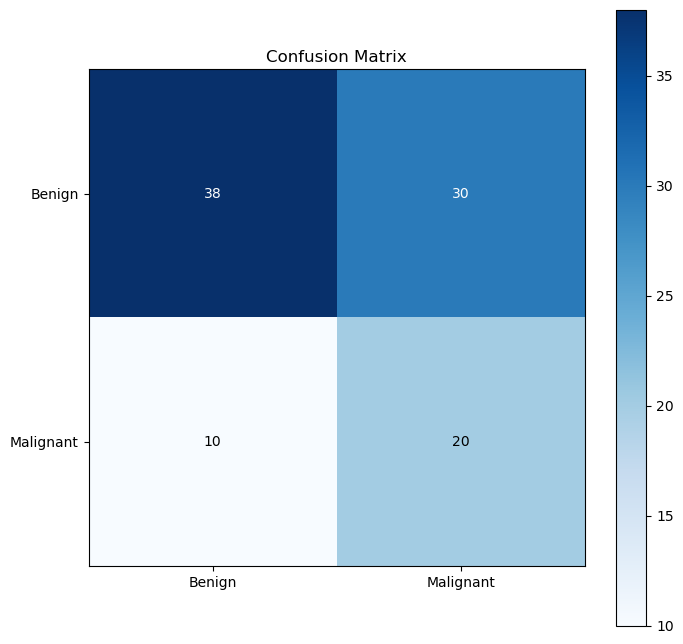

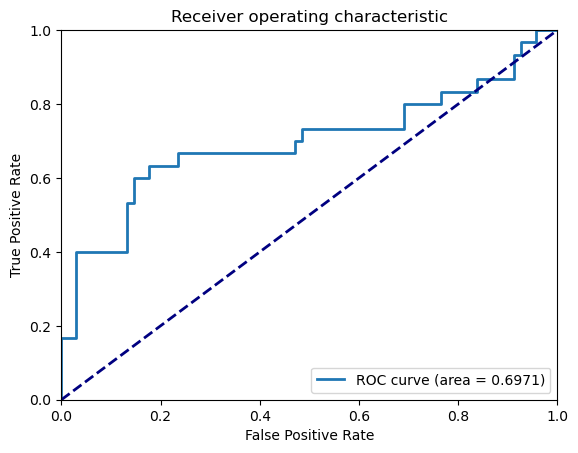

In [11]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]

model = Model_Training.build_model('vgg16',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Final_2/Final_2',metrics=metric,img_width=img_width,img_height=img_height)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)

In [27]:
# store_misclassified = misclassified_store+'vgg16/'
# model.evaluate(test)
# misclassified_inceptionv3_test = Model_Training.store_misclassified(model,test,store_misclassified+'test/')
# misclassified_inceptionv3_train = Model_Training.store_misclassified(model,train_test,store_misclassified+'train/')
# misclassified_inceptionv3_val = Model_Training.store_misclassified(model,val_test,store_misclassified+'val/')

# EfficientNet

In [12]:
weights = '/home/jj/FYP/Checkpoint/EffcientNetB3_INbreast_COSINE/'
train_log = '/home/jj/FYP/log/EffcientNetB3_INbreast_COSINE/'

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 efficientnetb3 (Functional)    (None, 7, 7, 1536)   10783535    ['sequential[0][0]']             
                                                                                                  
 global_average_pooling2d (Glob  (None, 1536)        0           ['efficientnetb3[0][0]']     

2023-03-30 04:22:28.061645: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


77/77 [==============================] - ETA: 0s - loss: 103.1232 - categorical_accuracy: 0.5798 - recall: 0.7371 - recall_1: 0.2234

2023-03-30 04:22:34.742417: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 Epoch 0: accuracy=0.5798, loss=103.1232, val_accuracy=0.6203, val_loss=102.6759,  - lr=0.0000010
77/77 [==============================] - 14s 82ms/step - loss: 103.1232 - categorical_accuracy: 0.5798 - recall: 0.7371 - recall_1: 0.2234 - val_loss: 102.6759 - val_categorical_accuracy: 0.6203 - val_recall: 0.7593 - val_recall_1: 0.3200
Epoch 2/2
77/77 [==============================] - 5s 66ms/step - loss: 70.8252 - categorical_accuracy: 0.7427 - recall: 0.8028 - recall_1: 0.6064 - val_loss: 45.5075 - val_categorical_accuracy: 0.7089 - val_recall: 0.6296 - val_recall_1: 0.8800
Epoch 3/3
77/77 [==============================] - 5s 66ms/step - loss: 22.6610 - categorical_accuracy: 0.7166 - recall: 0.7418 - recall_1: 0.6596 - val_loss: 8.5839 - val_categorical_accuracy: 0.7848 - val_recall: 0.8148 - val_recall_1: 0.7200
Epoch 4/4
77/77 [==============================] - 5s 66ms/step - loss: 3.5836 - categorical_accuracy: 0.7492 - recall: 0.7793 - recall_1: 0.6809 - val_loss: 1.1077 - val_c

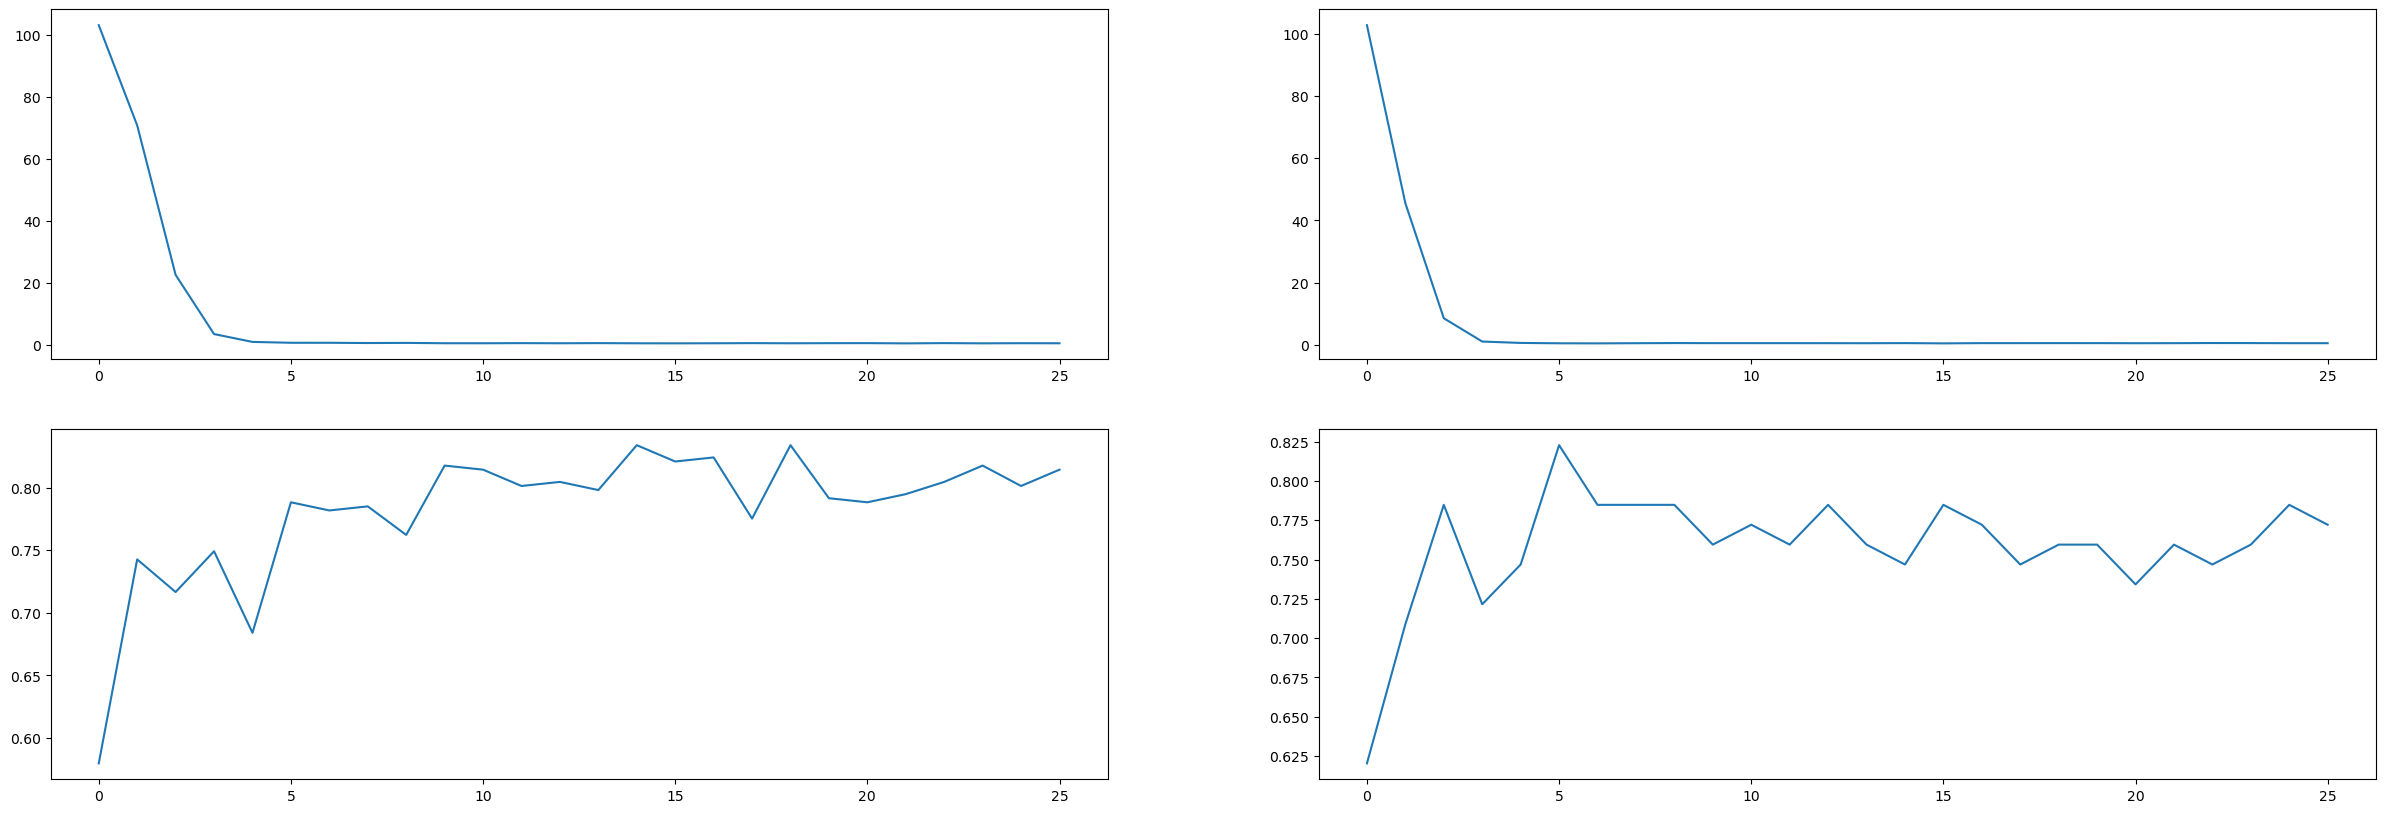

In [29]:
tf.keras.backend.clear_session()
weights = '/home/jj/FYP/Checkpoint/EffcientNetB3_INbreast_COSINE/'
train_log = '/home/jj/FYP/log/EffcientNetB3_INbreast_COSINE/'
model, effnet_dense_history = Model_Training.main(    
    'efficientnetb3',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    trainable_layers = False,flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'dense.csv',
    load_weights = False,
    save_weights = weights+'Dense/best_model',
    learning_rate=1e-3,init_lr=1e-6,warmup=5,cosine=20,min_lr=1e-6,
    optimiser=tf.keras.optimizers.Adam(),class_weight=class_weight,
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

## Fine Tune

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 efficientnetb3 (Functional)    (None, 7, 7, 1536)   10783535    ['sequential[0][0]']             
                                                                                                  
 global_average_pooling2d (Glob  (None, 1536)        0           ['efficientnetb3[0][0]']     

2023-03-30 04:25:00.832202: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


77/77 [==============================] - ETA: 0s - loss: 0.9684 - categorical_accuracy: 0.7459 - recall: 0.8545 - recall_1: 0.5000

2023-03-30 04:25:10.281001: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 Epoch 0: accuracy=0.7459, loss=0.9684, val_accuracy=0.8228, val_loss=0.5937,  - lr=0.0001000
77/77 [==============================] - 18s 92ms/step - loss: 0.9684 - categorical_accuracy: 0.7459 - recall: 0.8545 - recall_1: 0.5000 - val_loss: 0.5937 - val_categorical_accuracy: 0.8228 - val_recall: 0.9444 - val_recall_1: 0.5600
Epoch 2/2
77/77 [==============================] - 6s 75ms/step - loss: 0.8272 - categorical_accuracy: 0.7850 - recall: 0.9014 - recall_1: 0.5213 - val_loss: 0.5836 - val_categorical_accuracy: 0.8228 - val_recall: 0.9259 - val_recall_1: 0.6000
Epoch 3/3
77/77 [==============================] - 6s 74ms/step - loss: 0.7658 - categorical_accuracy: 0.7818 - recall: 0.8732 - recall_1: 0.5745 - val_loss: 0.5613 - val_categorical_accuracy: 0.7342 - val_recall: 0.7407 - val_recall_1: 0.7200
Epoch 4/4
77/77 [==============================] - 6s 75ms/step - loss: 0.6845 - categorical_accuracy: 0.7785 - recall: 0.8216 - recall_1: 0.6809 - val_loss: 0.5334 - val_categorical_

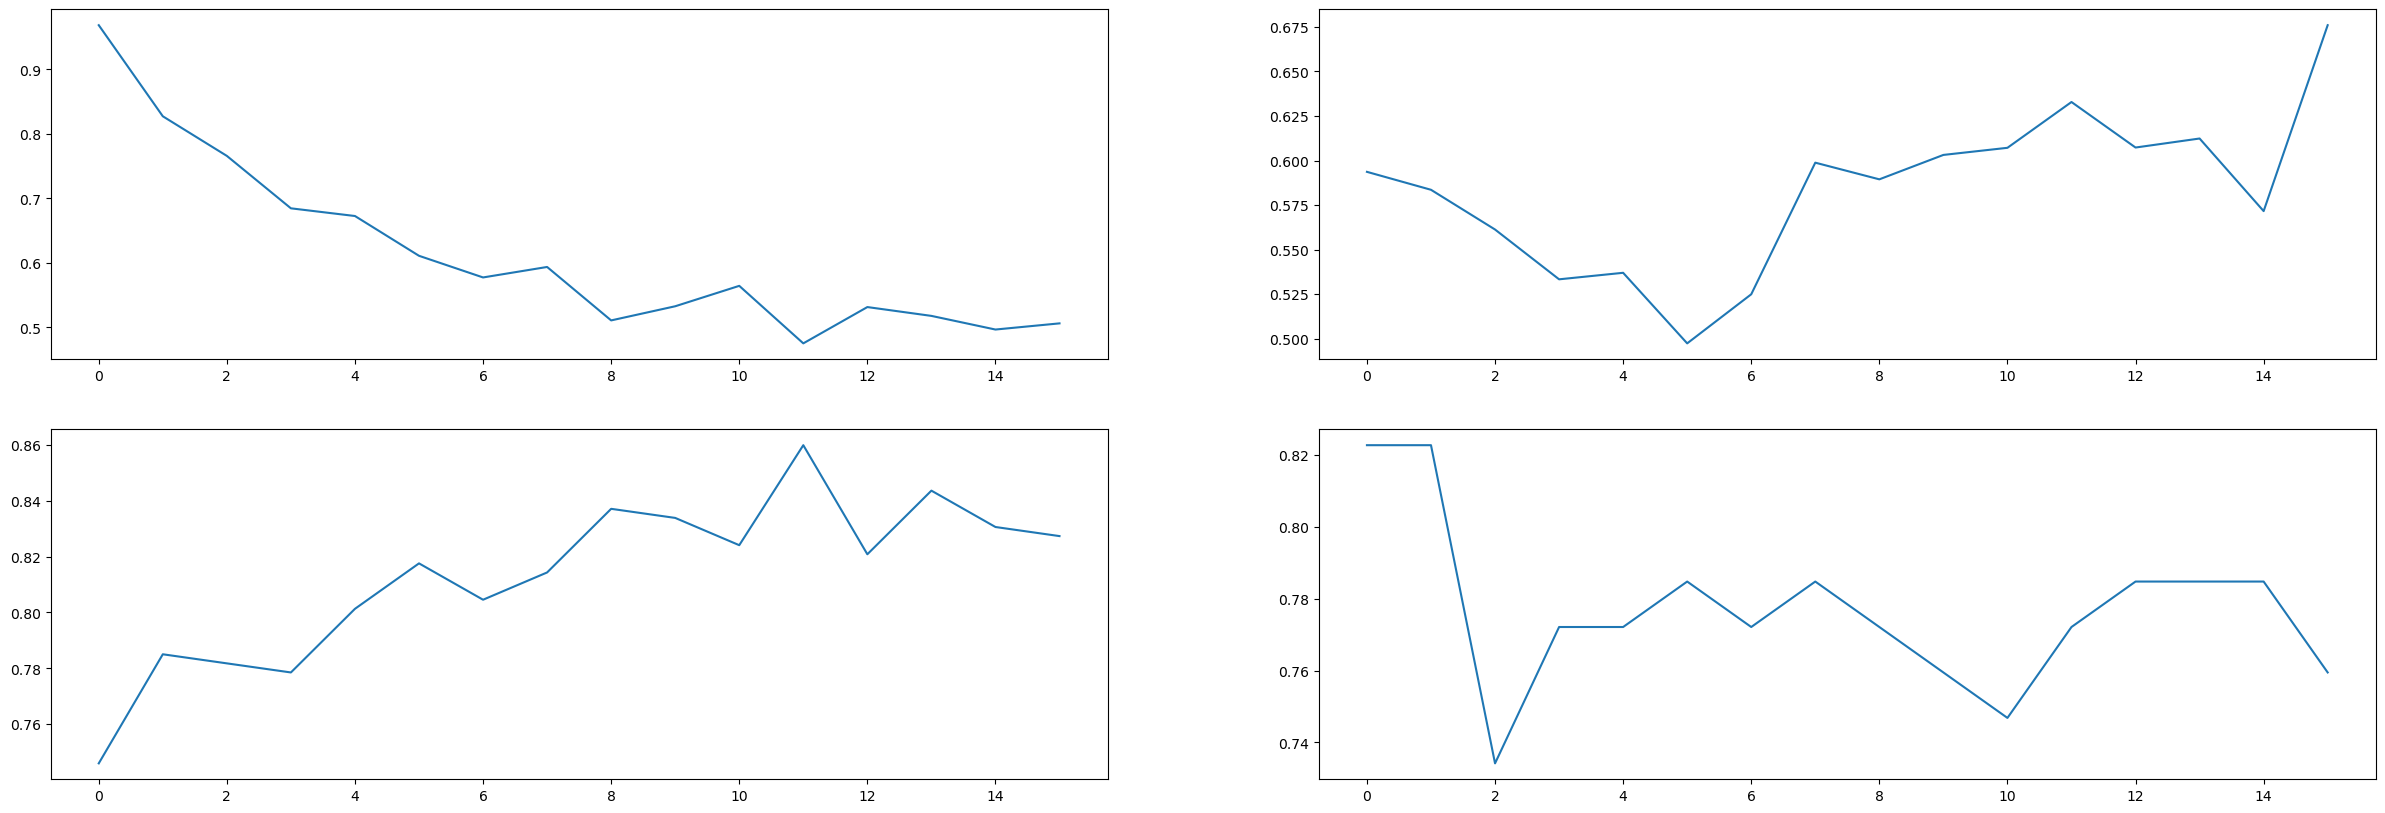

In [30]:
tf.keras.backend.clear_session()
model, effnet_fine_tune_history = Model_Training.main(    
    'efficientnetb3',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    trainable_layers = 75,flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'Fine_Tune.csv',
    load_weights = weights+'Dense/best_model',
    save_weights = weights+'Fine_Tune/best_model',
    learning_rate=1e-4,init_lr=1e-6,warmup=0,cosine=40,
    optimiser=tf.keras.optimizers.Adam(),class_weight=class_weight,
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)
model.save_weights(weights+'Final/Final')

## Test

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 efficientnetb3 (Functional)    (None, 7, 7, 1536)   10783535    ['input_2[0][0]']                
                                                                                                  
 global_average_pooling2d (Glob  (None, 1536)        0           ['efficientnetb3[0][0]']         
 alAveragePooling2D)                                                                              
                                                                                              

2023-03-30 04:26:47.588710: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


25/25 [==============================] - 2s 30ms/step - loss: 0.7196 - categorical_accuracy: 0.8163 - precision: 0.7143 - recall: 0.6667 - auc: 0.8550


2023-03-30 04:26:49.841051: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


25/25 [==============================] - 2s 27ms/step


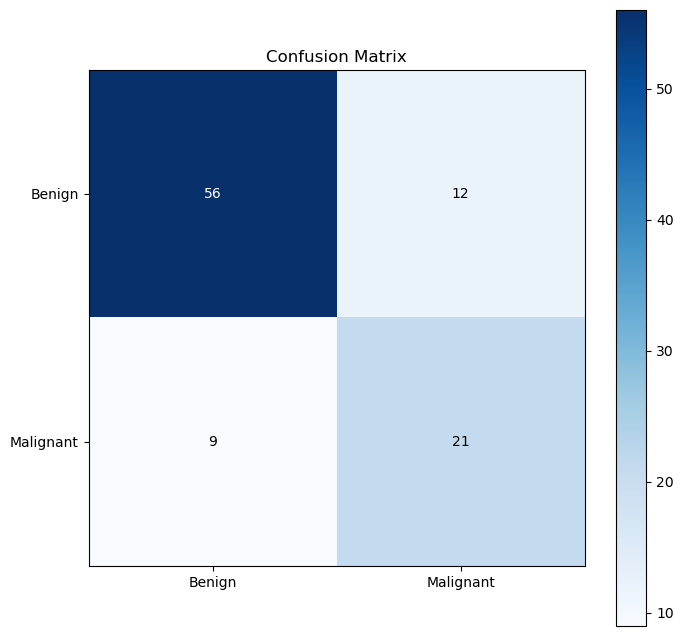

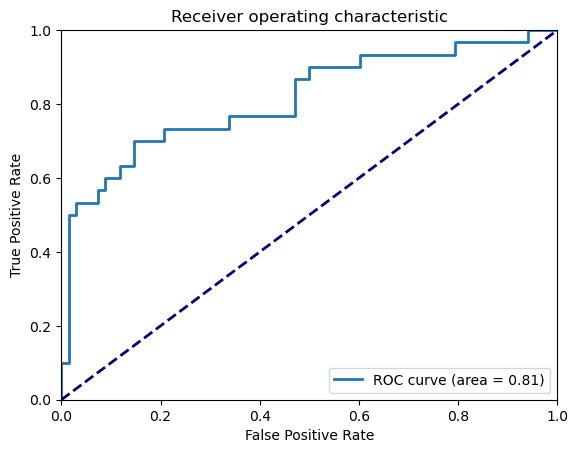

In [31]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('efficientnetb3',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Final/Final',metrics=metric,img_width=img_width,img_height=img_height)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 efficientnetb3 (Functional)    (None, 7, 7, 1536)   10783535    ['sequential[0][0]']             
                                                                                                  
 global_average_pooling2d (Glob  (None, 1536)        0           ['efficientnetb3[0][0]']     

2023-03-30 04:27:07.249939: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


77/77 [==============================] - ETA: 0s - loss: 1.1300 - categorical_accuracy: 0.6384 - recall: 0.8592 - recall_1: 0.1383

2023-03-30 04:27:28.165450: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 Epoch 0: accuracy=0.6384, loss=1.1300, val_accuracy=0.6835, val_loss=0.7409,  - lr=0.0001000
77/77 [==============================] - 32s 129ms/step - loss: 1.1300 - categorical_accuracy: 0.6384 - recall: 0.8592 - recall_1: 0.1383 - val_loss: 0.7409 - val_categorical_accuracy: 0.6835 - val_recall: 1.0000 - val_recall_1: 0.0000e+00
Epoch 2/2
77/77 [==============================] - 9s 112ms/step - loss: 0.9370 - categorical_accuracy: 0.6971 - recall: 1.0000 - recall_1: 0.0106 - val_loss: 0.7152 - val_categorical_accuracy: 0.5823 - val_recall: 0.7963 - val_recall_1: 0.1200
Epoch 3/3
77/77 [==============================] - 9s 110ms/step - loss: 0.9305 - categorical_accuracy: 0.6840 - recall: 0.9624 - recall_1: 0.0532 - val_loss: 0.7012 - val_categorical_accuracy: 0.6835 - val_recall: 1.0000 - val_recall_1: 0.0000e+00
Epoch 4/4
77/77 [==============================] - 9s 114ms/step - loss: 0.9169 - categorical_accuracy: 0.6938 - recall: 1.0000 - recall_1: 0.0000e+00 - val_loss: 0.6957 - 

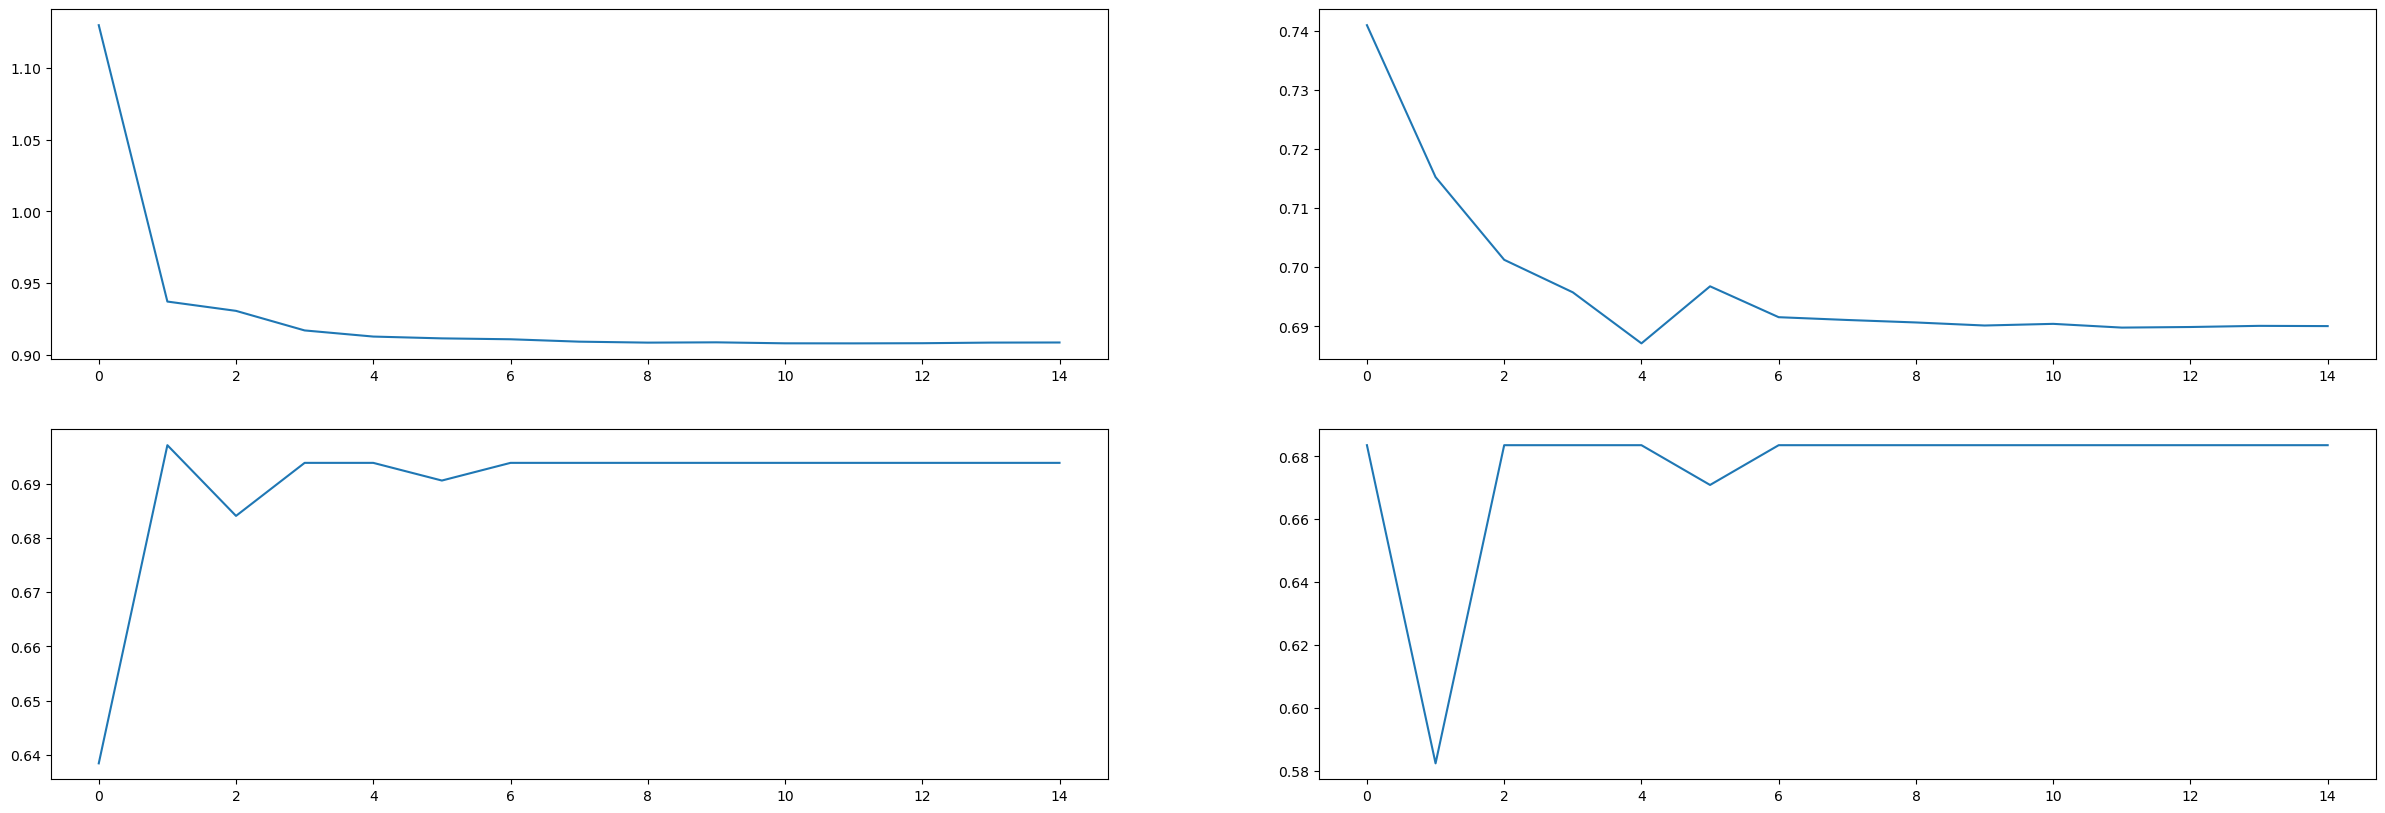

In [32]:
tf.keras.backend.clear_session()
model, effnet_fine_tune_history = Model_Training.main(    
    'efficientnetb3',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    trainable_layers = -1,flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'Fine_Tune_2.csv',
    load_weights = weights+'Fine_Tune/best_model',
    save_weights = weights+'Fine_Tune_2/best_model',
    learning_rate=1e-4,init_lr=1e-6,warmup=0,cosine=40,
    optimiser=tf.keras.optimizers.Adam(),class_weight=class_weight,
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)
model.save_weights(weights+'Final_2/Final_2')

In [13]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('efficientnetb3',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Final_2/Final_2',metrics=metric,img_width=img_width,img_height=img_height)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 efficientnetb3 (Functional)    (None, 7, 7, 1536)   10783535    ['input_2[0][0]']                
                                                                                                  
 global_average_pooling2d (Glob  (None, 1536)        0           ['efficientnetb3[0][0]']         
 alAveragePooling2D)                                                                              
                                                                                              

In [34]:
# store_misclassified = misclassified_store+'efficientnetb3/'
# model.evaluate(test)
# misclassified_inceptionv3_test = Model_Training.store_misclassified(model,test,store_misclassified+'test/')
# misclassified_inceptionv3_train = Model_Training.store_misclassified(model,train_test,store_misclassified+'train/')
# misclassified_inceptionv3_val = Model_Training.store_misclassified(model,val_test,store_misclassified+'val/')

2023-03-30 15:16:02.372276: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


25/25 [==============================] - 2s 34ms/step - loss: 0.5509 - categorical_accuracy: 0.8061 - precision: 0.6774 - recall: 0.7000 - auc: 0.8554


2023-03-30 15:16:04.560963: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


25/25 [==============================] - 2s 26ms/step


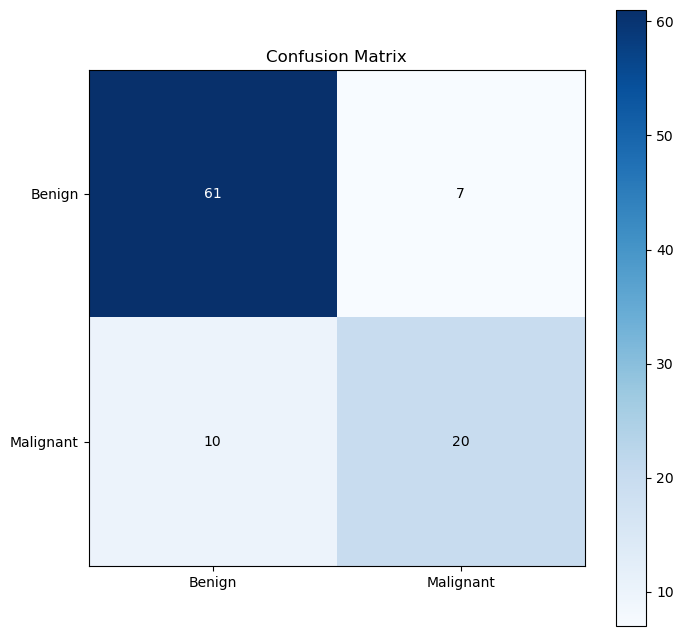

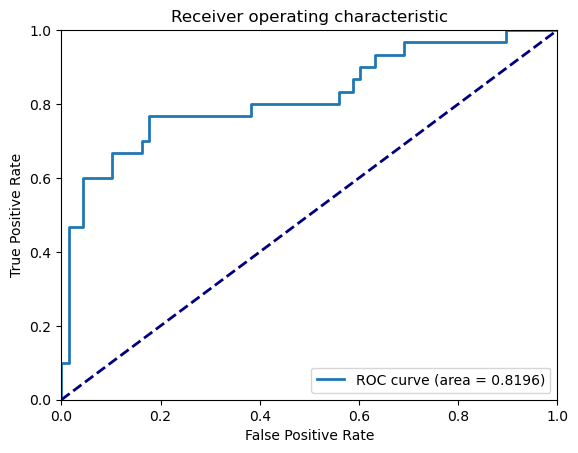

In [14]:
model.load_weights(weights+'Fine_Tune/best_model')
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
tf.keras.backend.clear_session()

# ConvNext

In [6]:
weights = '/home/jj/FYP/Checkpoint/Convnext_INbreast_COSINE/'
train_log = '/home/jj/FYP/log/Convnext_INbreast_COSINE/'

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 convnext_base (Functional)     (None, 7, 7, 1024)   87566464    ['sequential[0][0]']             
                                                                                                  
 global_average_pooling2d (Glob  (None, 1024)        0           ['convnext_base[0][0]']      

2023-03-30 03:29:59.676231: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-30 03:30:01.921279: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f8b3f9e9720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-30 03:30:01.921310: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-03-30 03:30:02.594066: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-03-30 03:30:02.600720: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-30 03:30:08.875985: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECT

20/20 [==============================] - 51s 2s/step - loss: 103.2330 - categorical_accuracy: 0.6580 - recall: 0.8498 - recall_1: 0.2234 - val_loss: 102.9523 - val_categorical_accuracy: 0.6329 - val_recall: 0.8333 - val_recall_1: 0.2000
Epoch 2/2
20/20 [==============================] - 7s 327ms/step - loss: 93.6556 - categorical_accuracy: 0.7199 - recall: 0.7606 - recall_1: 0.6277 - val_loss: 82.7734 - val_categorical_accuracy: 0.7722 - val_recall: 0.7593 - val_recall_1: 0.8000
Epoch 3/3
20/20 [==============================] - 7s 318ms/step - loss: 68.3446 - categorical_accuracy: 0.7101 - recall: 0.7277 - recall_1: 0.6702 - val_loss: 52.9055 - val_categorical_accuracy: 0.7342 - val_recall: 0.6481 - val_recall_1: 0.9200
Epoch 4/4
20/20 [==============================] - 7s 324ms/step - loss: 39.5324 - categorical_accuracy: 0.7231 - recall: 0.7512 - recall_1: 0.6596 - val_loss: 26.7101 - val_categorical_accuracy: 0.5190 - val_recall: 0.2963 - val_recall_1: 1.0000
Epoch 5/5
20/20 [=====

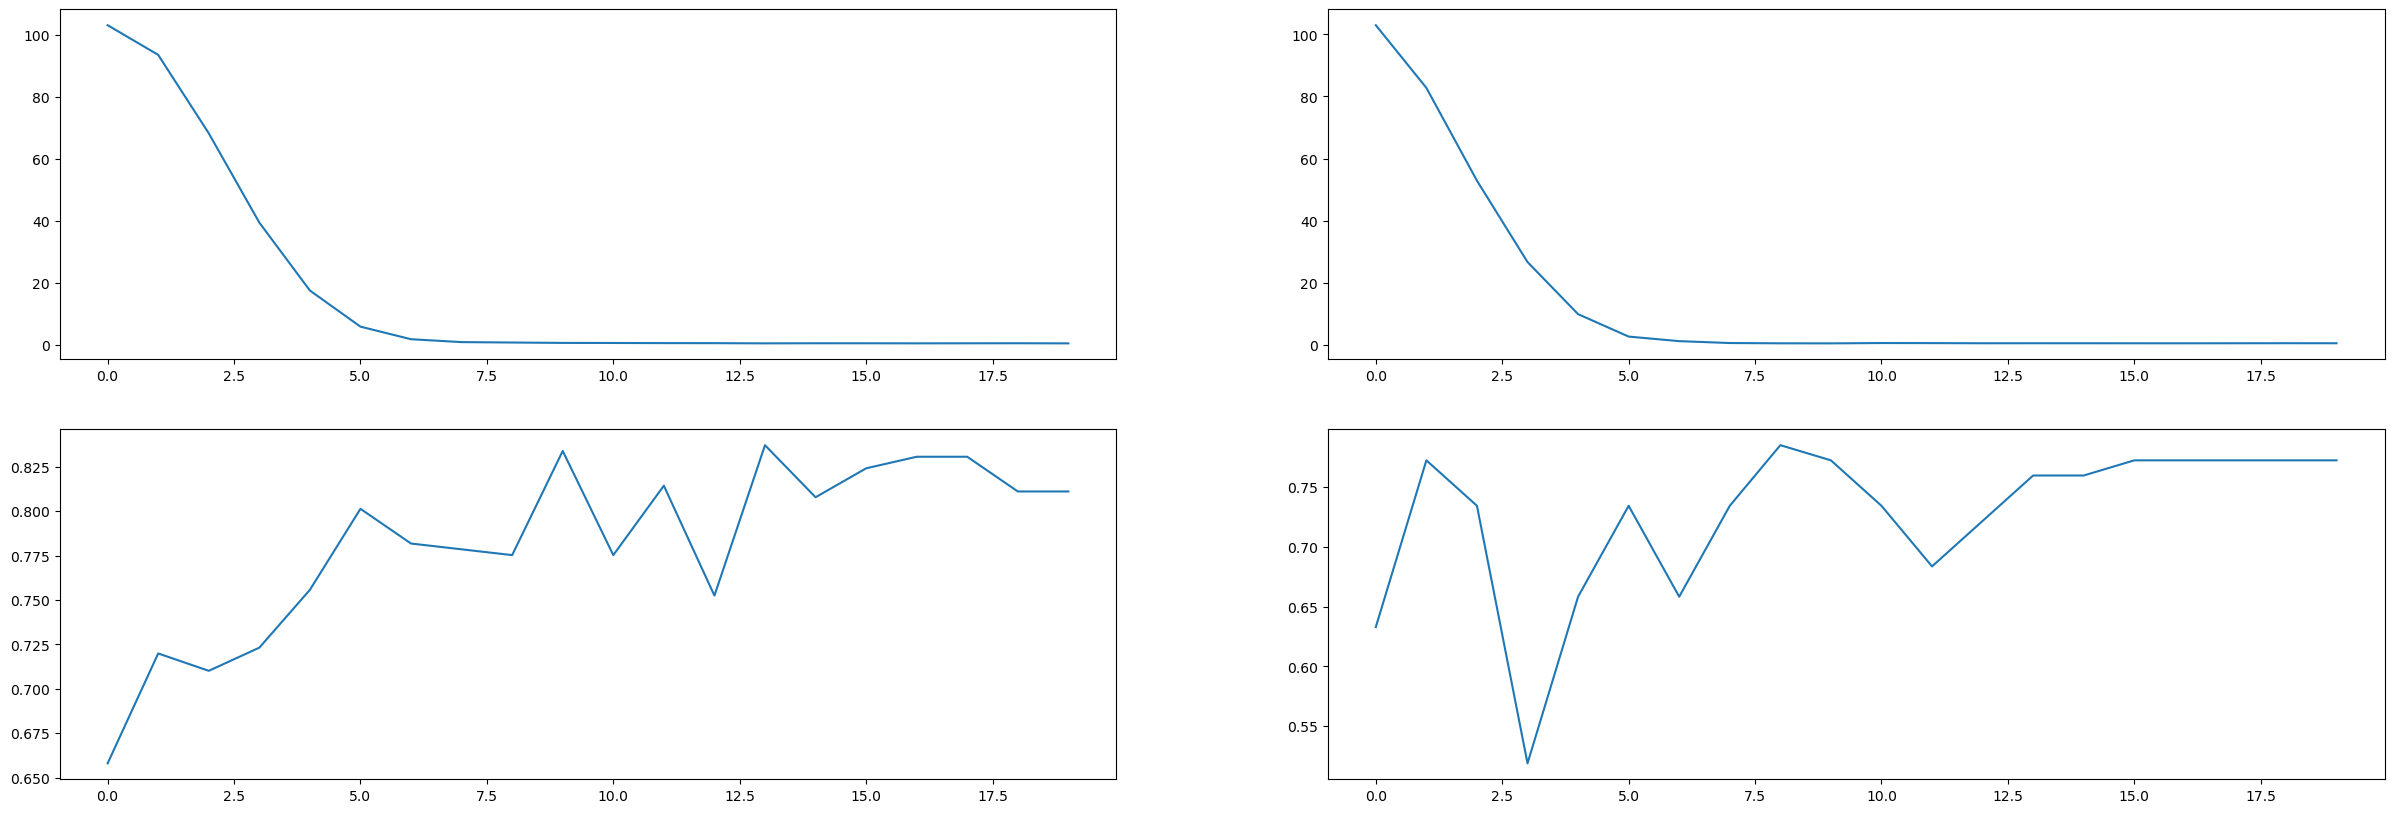

In [7]:
tf.keras.backend.clear_session()
model, convnext_dense_history = Model_Training.main(    
    'convnext',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    trainable_layers = False,flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'dense.csv',
    load_weights = False,
    save_weights = weights+'Dense/best_model',
    learning_rate=1e-3,init_lr=1e-6,warmup=5,cosine=20,min_lr=1e-6,class_weight=class_weight,
    optimiser=tf.keras.optimizers.Adam(),
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

## Fine Tune

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 convnext_base (Functional)     (None, 7, 7, 1024)   87566464    ['sequential[0][0]']             
                                                                                                  
 global_average_pooling2d (Glob  (None, 1024)        0           ['convnext_base[0][0]']      

2023-03-30 03:41:19.797413: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-30 03:41:21.872526: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fc3d04a8370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-30 03:41:21.872555: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-03-30 03:41:22.533575: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-03-30 03:41:22.537530: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-30 03:41:29.211050: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECT

20/20 [==============================] - 65s 2s/step - loss: 0.7371 - categorical_accuracy: 0.7590 - recall: 0.7934 - recall_1: 0.6809 - val_loss: 0.4636 - val_categorical_accuracy: 0.7722 - val_recall: 0.7593 - val_recall_1: 0.8000
Epoch 2/2
20/20 [==============================] - 7s 346ms/step - loss: 0.6441 - categorical_accuracy: 0.7915 - recall: 0.8263 - recall_1: 0.7128 - val_loss: 0.6460 - val_categorical_accuracy: 0.7089 - val_recall: 0.6296 - val_recall_1: 0.8800
Epoch 3/3
20/20 [==============================] - 7s 344ms/step - loss: 0.5870 - categorical_accuracy: 0.8371 - recall: 0.8404 - recall_1: 0.8298 - val_loss: 0.5027 - val_categorical_accuracy: 0.7215 - val_recall: 0.6481 - val_recall_1: 0.8800
Epoch 4/4
20/20 [==============================] - 7s 352ms/step - loss: 0.6171 - categorical_accuracy: 0.7524 - recall: 0.7136 - recall_1: 0.8404 - val_loss: 0.4684 - val_categorical_accuracy: 0.7215 - val_recall: 0.7037 - val_recall_1: 0.7600
Epoch 5/5
20/20 [===============

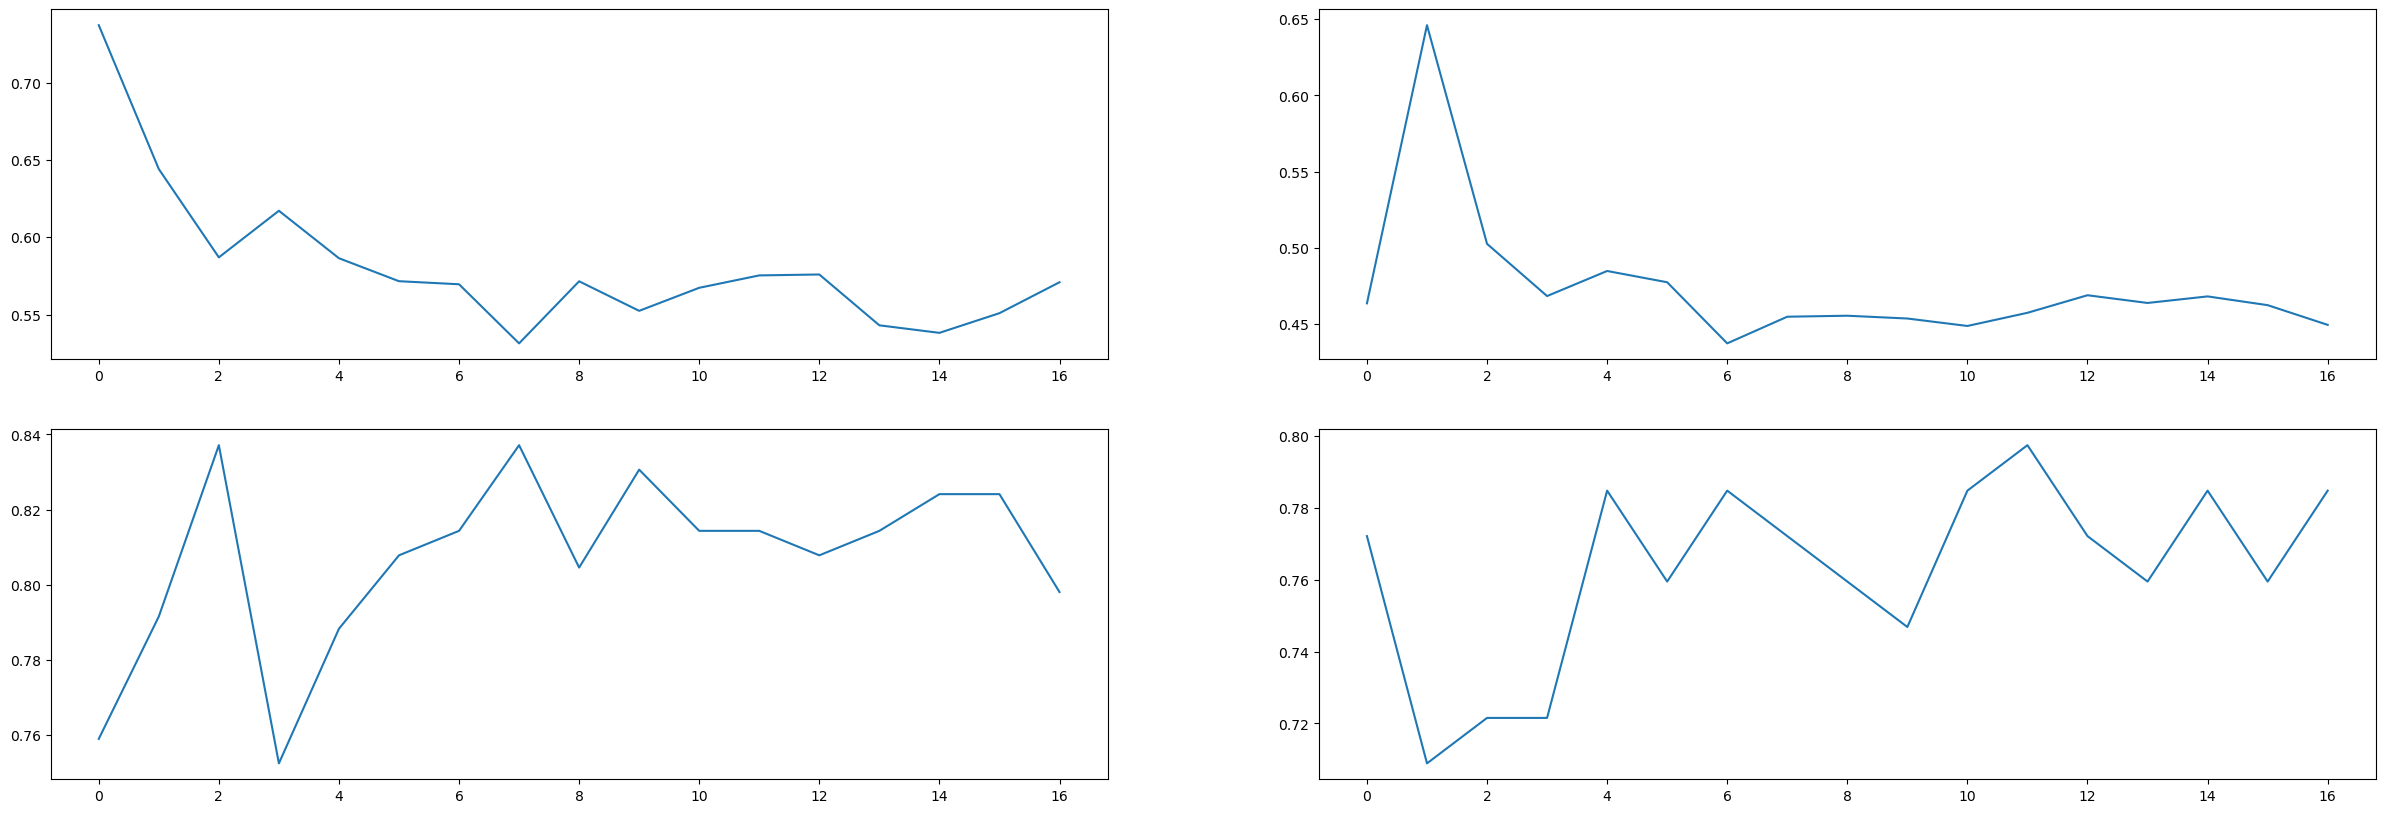

In [7]:
tf.keras.backend.clear_session()
weights = '/home/jj/FYP/Checkpoint/Convnext_INbreast_COSINE/'
train_log = '/home/jj/FYP/log/Convnext_INbreast_COSINE/'
model, convnext_fine_tune_history = Model_Training.main(    
    'convnext',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    # Top 25 layers are the stage 3 blocks
    trainable_layers = 25,flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'Fine_Tune.csv',
    load_weights = weights+'Dense/best_model',
    save_weights = weights+'Fine_Tune/best_model',
    learning_rate=1e-4,init_lr=1e-6,warmup=0,cosine=40,
    optimiser=tf.keras.optimizers.Adam(),class_weight=class_weight,
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)
model.save_weights(weights+'Final/Final')

## Test

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 convnext_base (Functional)     (None, 7, 7, 1024)   87566464    ['input_2[0][0]']                
                                                                                                  
 global_average_pooling2d (Glob  (None, 1024)        0           ['convnext_base[0][0]']          
 alAveragePooling2D)                                                                              
                                                                                              

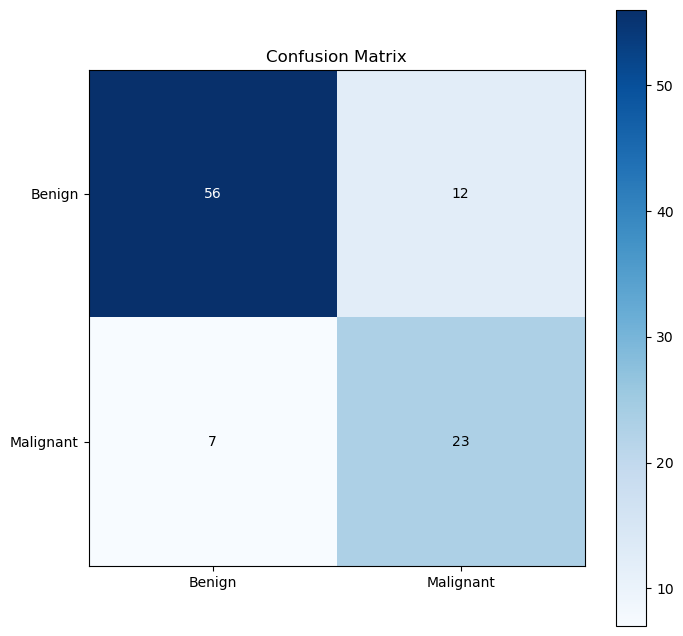

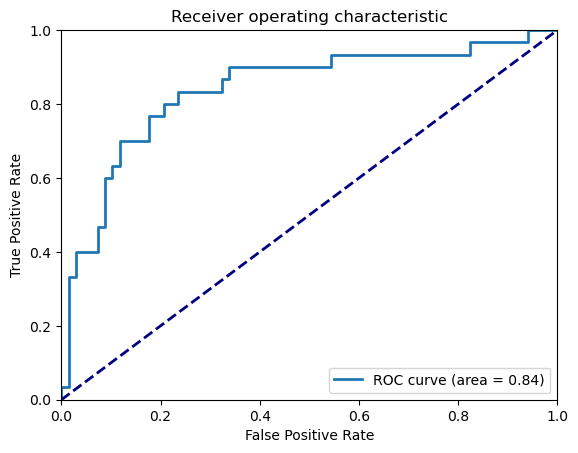

In [8]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('convnext',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Fine_Tune/best_model',metrics=metric,img_width=img_width,img_height=img_height)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)

## FT2

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 convnext_base (Functional)     (None, 7, 7, 1024)   87566464    ['sequential[0][0]']             
                                                                                                  
 global_average_pooling2d (Glob  (None, 1024)        0           ['convnext_base[0][0]']      

2023-03-30 03:55:18.338771: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-30 03:55:19.756280: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f9151a258e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-30 03:55:19.756313: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-03-30 03:55:20.184692: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-03-30 03:55:20.186963: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-30 03:55:21.537024: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.17GiB with freed_by_count=0. Th

76/77 [============================>.] - ETA: 0s - loss: 0.6990 - categorical_accuracy: 0.7796 - recall: 0.8095 - recall_1: 0.7128

2023-03-30 03:55:53.315309: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-03-30 03:55:53.315350: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-03-30 03:55:54.165868: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-03-30 03:55:54.165916: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU

77/77 [==============================] - 64s 355ms/step - loss: 0.7018 - categorical_accuracy: 0.7785 - recall: 0.8075 - recall_1: 0.7128 - val_loss: 0.4692 - val_categorical_accuracy: 0.7595 - val_recall: 0.7037 - val_recall_1: 0.8800
Epoch 2/2
77/77 [==============================] - 19s 239ms/step - loss: 0.5496 - categorical_accuracy: 0.8436 - recall: 0.8685 - recall_1: 0.7872 - val_loss: 0.4014 - val_categorical_accuracy: 0.8228 - val_recall: 0.8333 - val_recall_1: 0.8000
Epoch 3/3
77/77 [==============================] - 19s 240ms/step - loss: 0.4809 - categorical_accuracy: 0.8469 - recall: 0.8545 - recall_1: 0.8298 - val_loss: 0.4310 - val_categorical_accuracy: 0.7975 - val_recall: 0.8333 - val_recall_1: 0.7200
Epoch 4/4
77/77 [==============================] - 19s 240ms/step - loss: 0.4599 - categorical_accuracy: 0.8664 - recall: 0.8779 - recall_1: 0.8404 - val_loss: 0.4717 - val_categorical_accuracy: 0.8481 - val_recall: 0.8333 - val_recall_1: 0.8800
Epoch 5/5
77/77 [=========

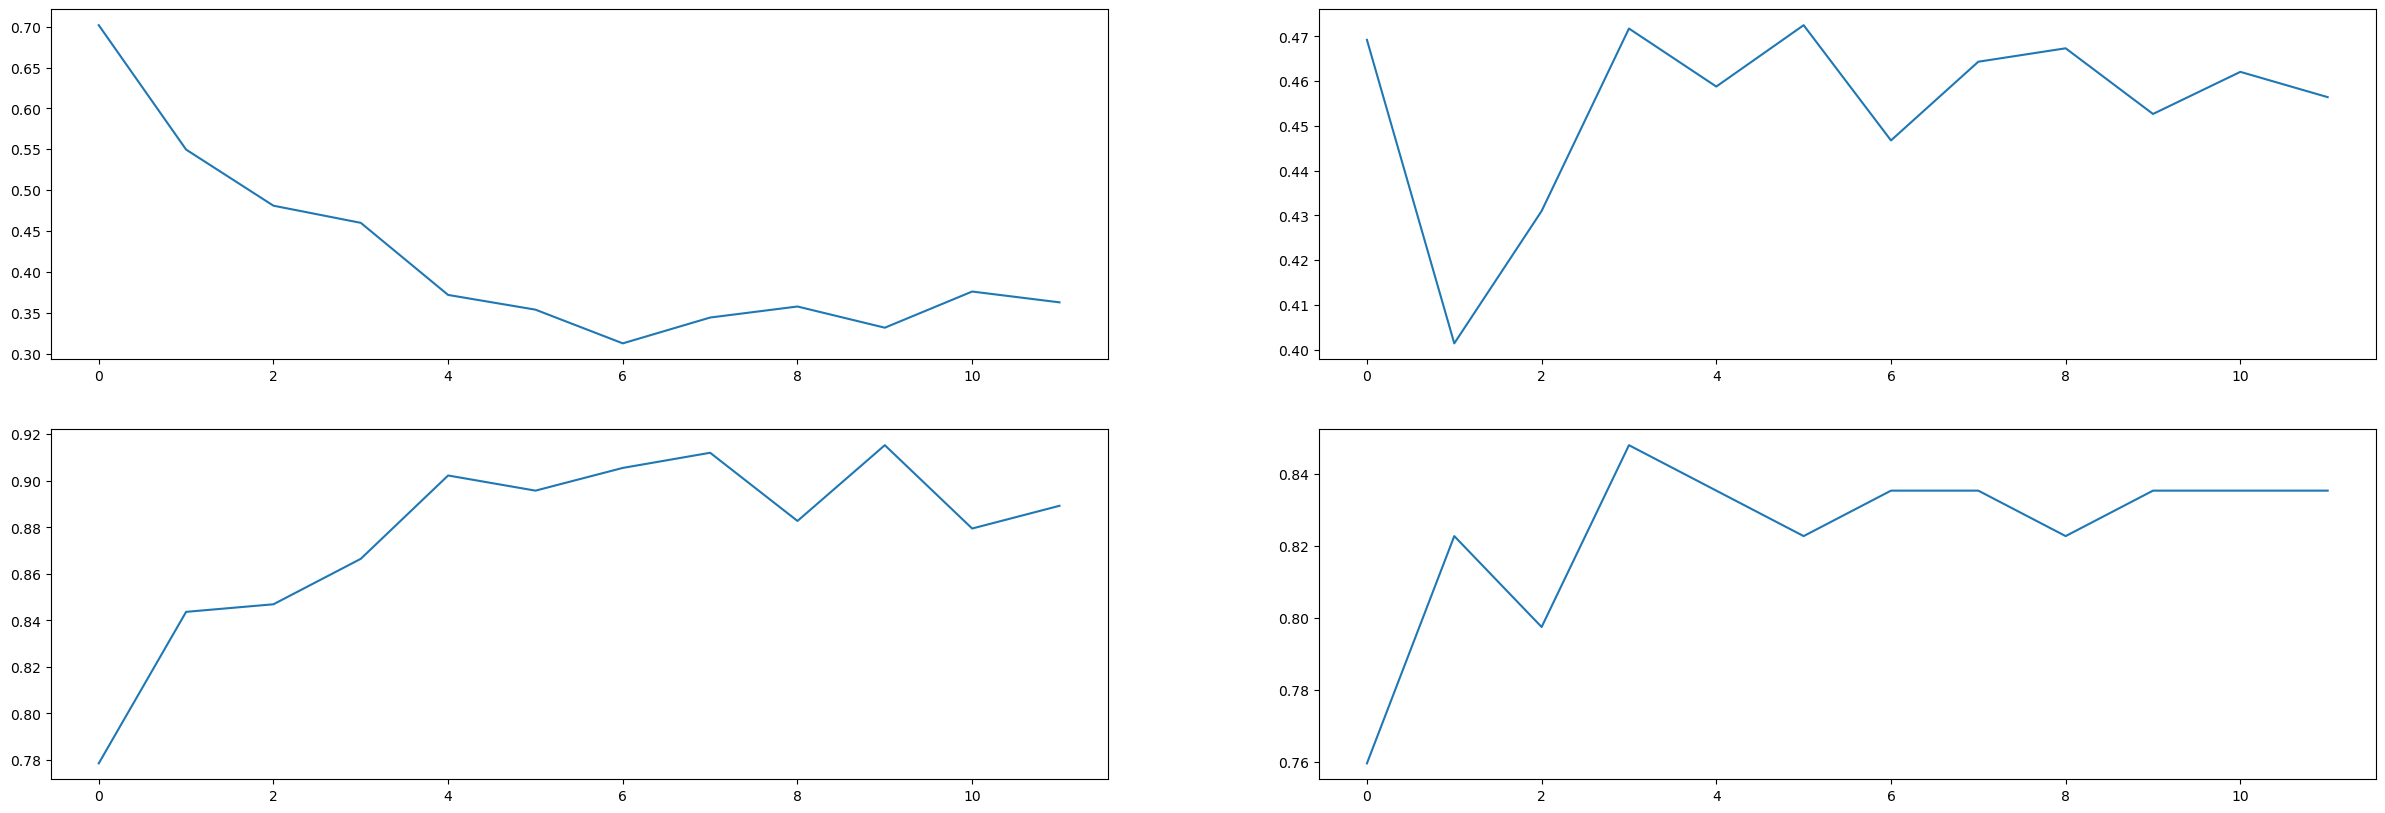

In [8]:
tf.keras.backend.clear_session()
model, convnext_fine_tune_2_history = Model_Training.main(    
    'convnext',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    # Top 25 layers are the stage 3 blocks
    trainable_layers = -1,flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'Fine_Tune_2.csv',
    load_weights = weights+'Fine_Tune/best_model',
    save_weights = weights+'Fine_Tune_2/best_model',
    learning_rate=1e-5,init_lr=1e-6,warmup=0,cosine=40,
    optimiser=tf.keras.optimizers.Adam(),class_weight=class_weight,
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)
model.save_weights(weights+'Final_2/Final_2')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 convnext_base (Functional)     (None, 7, 7, 1024)   87566464    ['input_2[0][0]']                
                                                                                                  
 global_average_pooling2d (Glob  (None, 1024)        0           ['convnext_base[0][0]']          
 alAveragePooling2D)                                                                              
                                                                                              

2023-03-30 15:50:43.942113: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-30 15:50:47.494222: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f221b3b40f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-30 15:50:47.494820: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-03-30 15:50:47.934285: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-03-30 15:50:47.940987: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


25/25 [==============================] - 4s 90ms/step


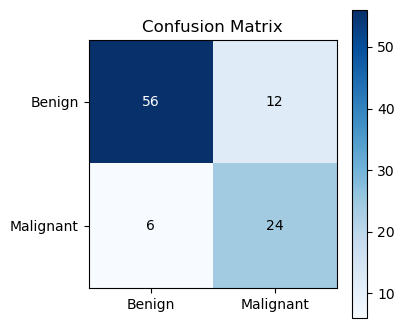

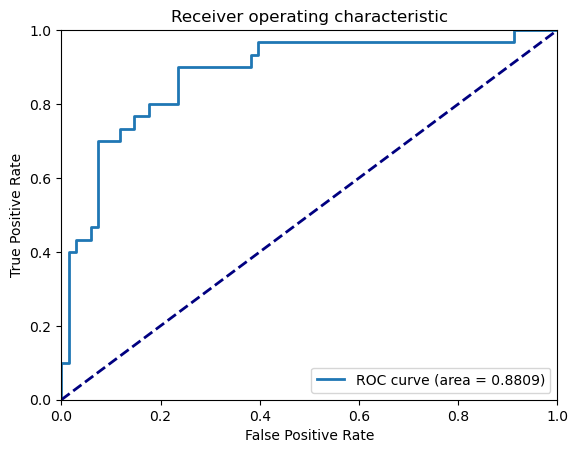

In [7]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('convnext',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Final_2/Final_2',metrics=metric,img_width=img_width,img_height=img_height,training=False)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)

In [ ]:
# store_misclassified = misclassified_store+'convnext/'
# model.evaluate(test)
# misclassified_inceptionv3_test = Model_Training.store_misclassified(model,test,store_misclassified+'test/')
# misclassified_inceptionv3_train = Model_Training.store_misclassified(model,train_test,store_misclassified+'train/')
# misclassified_inceptionv3_val = Model_Training.store_misclassified(model,val_test,store_misclassified+'val/')

# EfficientNet V2M

## Initialising

In [18]:
weights = '/home/jj/FYP/Checkpoint/Efficientnetv2m_INbreast_COSINE/'
train_log = '/home/jj/FYP/log/Efficientnetv2m_INbreast_COSINE/'

In [17]:
tf.keras.backend.clear_session()


model, effnetv2m_dense_history = Model_Training.main(    
    'efficientnetv2m',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    trainable_layers = False,flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'dense.csv',
    load_weights = False,
    save_weights = weights+'Dense/best_model',
    learning_rate=1e-3,init_lr=1e-6,warmup=5,cosine=20,min_lr=1e-6,
    optimiser=tf.keras.optimizers.Adam(),class_weight=class_weight,
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 efficientnetv2-m (Functional)  (None, 7, 7, 1280)   53150388    ['sequential[0][0]']             
                                                                                                  
 global_average_pooling2d (Glob  (None, 1280)        0           ['efficientnetv2-m[0][0]']   

KeyboardInterrupt: 

## Fine Tuning

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 efficientnetv2-m (Functional)  (None, 7, 7, 1280)   53150388    ['sequential[0][0]']             
                                                                                                  
 global_average_pooling2d (Glob  (None, 1280)        0           ['efficientnetv2-m[0][0]']   

2023-03-30 04:34:23.810622: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


77/77 [==============================] - ETA: 0s - loss: 1.3141 - categorical_accuracy: 0.6645 - recall: 0.8404 - recall_1: 0.2660

2023-03-30 04:34:36.274258: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 Epoch 0: accuracy=0.6645, loss=1.3141, val_accuracy=0.7975, val_loss=0.7027,  - lr=0.0001000
77/77 [==============================] - 25s 136ms/step - loss: 1.3141 - categorical_accuracy: 0.6645 - recall: 0.8404 - recall_1: 0.2660 - val_loss: 0.7027 - val_categorical_accuracy: 0.7975 - val_recall: 0.7778 - val_recall_1: 0.8400
Epoch 2/2
77/77 [==============================] - 8s 101ms/step - loss: 0.8396 - categorical_accuracy: 0.7622 - recall: 0.8404 - recall_1: 0.5851 - val_loss: 0.5622 - val_categorical_accuracy: 0.7342 - val_recall: 0.8333 - val_recall_1: 0.5200
Epoch 3/3
77/77 [==============================] - 8s 102ms/step - loss: 0.7746 - categorical_accuracy: 0.8046 - recall: 0.8638 - recall_1: 0.6702 - val_loss: 0.5793 - val_categorical_accuracy: 0.7848 - val_recall: 0.8704 - val_recall_1: 0.6000
Epoch 4/4
77/77 [==============================] - 8s 97ms/step - loss: 0.7030 - categorical_accuracy: 0.8111 - recall: 0.8967 - recall_1: 0.6170 - val_loss: 0.6663 - val_categoric

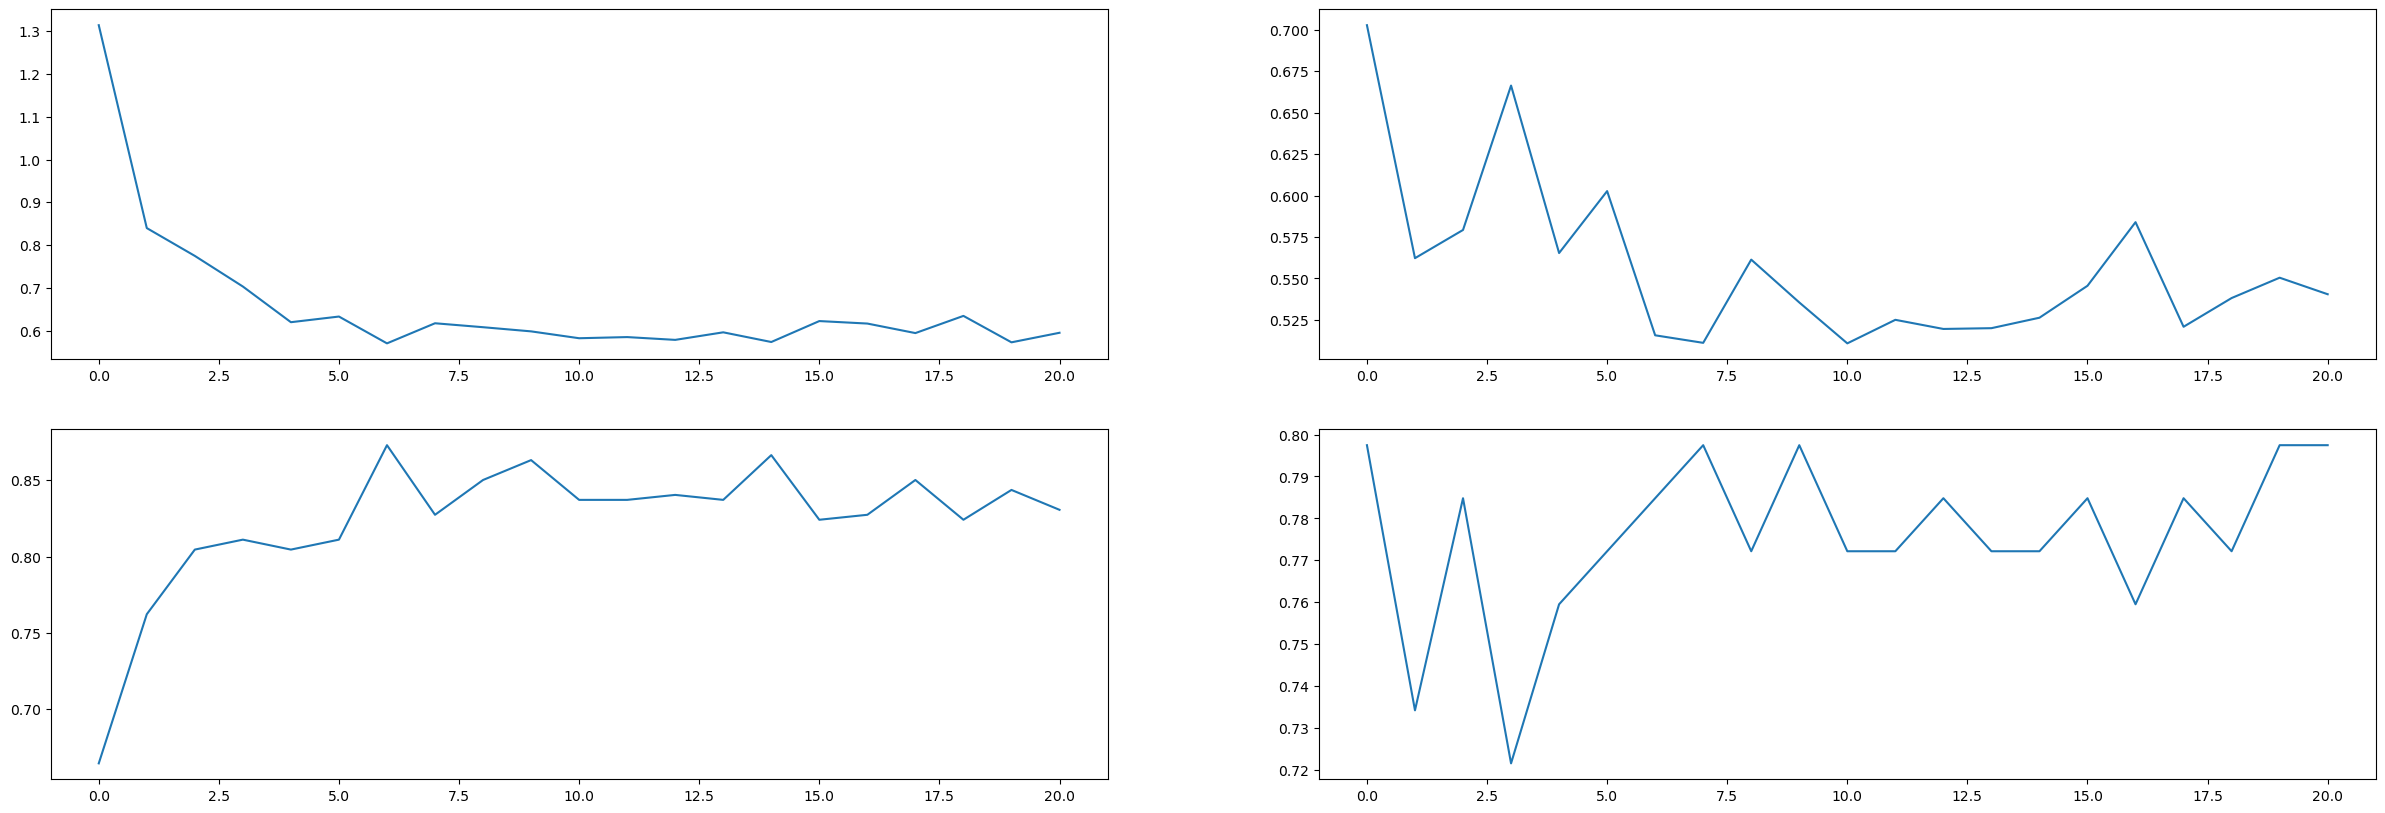

In [37]:
tf.keras.backend.clear_session()
model, effnetv2m_fine_tune_history = Model_Training.main(    
    'efficientnetv2m',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    trainable_layers = 75,flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'Fine_Tune.csv',
    load_weights = weights+'Dense/best_model',
    save_weights = weights+'Fine_Tune/best_model',
    learning_rate=1e-4,init_lr=1e-6,warmup=0,cosine=40,
    optimiser=tf.keras.optimizers.Adam(),class_weight=class_weight,
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)
model.save_weights(weights+'Final/Final')

## Test

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 efficientnetv2-m (Functional)  (None, 7, 7, 1280)   53150388    ['input_2[0][0]']                
                                                                                                  
 global_average_pooling2d (Glob  (None, 1280)        0           ['efficientnetv2-m[0][0]']       
 alAveragePooling2D)                                                                              
                                                                                              

2023-03-30 04:37:33.239520: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


25/25 [==============================] - 6s 50ms/step - loss: 0.5526 - categorical_accuracy: 0.7857 - precision: 0.6286 - recall: 0.7333 - auc: 0.8073


2023-03-30 04:37:37.533701: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


25/25 [==============================] - 4s 48ms/step


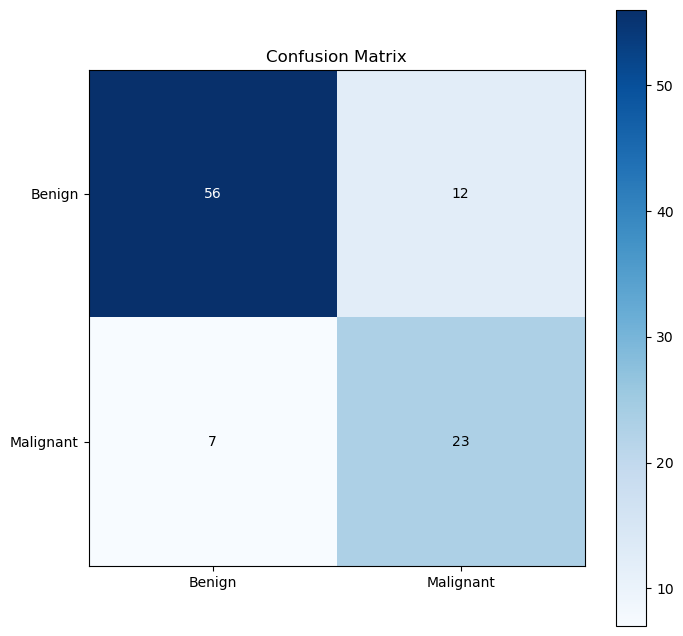

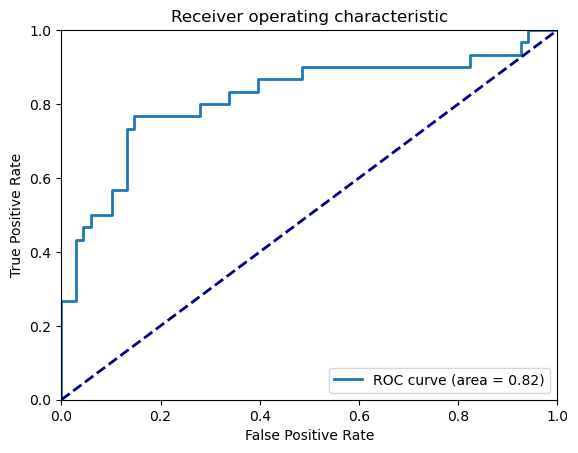

In [38]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('efficientnetv2m',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Final/Final',metrics=metric,img_width=img_width,img_height=img_height)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)

## FT2

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 efficientnetv2-m (Functional)  (None, 7, 7, 1280)   53150388    ['sequential[0][0]']             
                                                                                                  
 global_average_pooling2d (Glob  (None, 1280)        0           ['efficientnetv2-m[0][0]']   

2023-03-30 07:20:23.066649: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


77/77 [==============================] - ETA: 0s - loss: 0.7912 - categorical_accuracy: 0.7557 - recall: 0.8263 - recall_1: 0.5957

2023-03-30 07:21:00.468327: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 Epoch 0: accuracy=0.7557, loss=0.7912, val_accuracy=0.7468, val_loss=0.6286,  - lr=0.0000100
77/77 [==============================] - 60s 235ms/step - loss: 0.7912 - categorical_accuracy: 0.7557 - recall: 0.8263 - recall_1: 0.5957 - val_loss: 0.6286 - val_categorical_accuracy: 0.7468 - val_recall: 0.7407 - val_recall_1: 0.7600
Epoch 2/2
77/77 [==============================] - 13s 169ms/step - loss: 0.6335 - categorical_accuracy: 0.8274 - recall: 0.8592 - recall_1: 0.7553 - val_loss: 0.5402 - val_categorical_accuracy: 0.7848 - val_recall: 0.7963 - val_recall_1: 0.7600
Epoch 3/3
77/77 [==============================] - 13s 169ms/step - loss: 0.5927 - categorical_accuracy: 0.8371 - recall: 0.8873 - recall_1: 0.7234 - val_loss: 0.5413 - val_categorical_accuracy: 0.7595 - val_recall: 0.7407 - val_recall_1: 0.8000
Epoch 4/4
77/77 [==============================] - 13s 169ms/step - loss: 0.6156 - categorical_accuracy: 0.8306 - recall: 0.8779 - recall_1: 0.7234 - val_loss: 0.5268 - val_categ

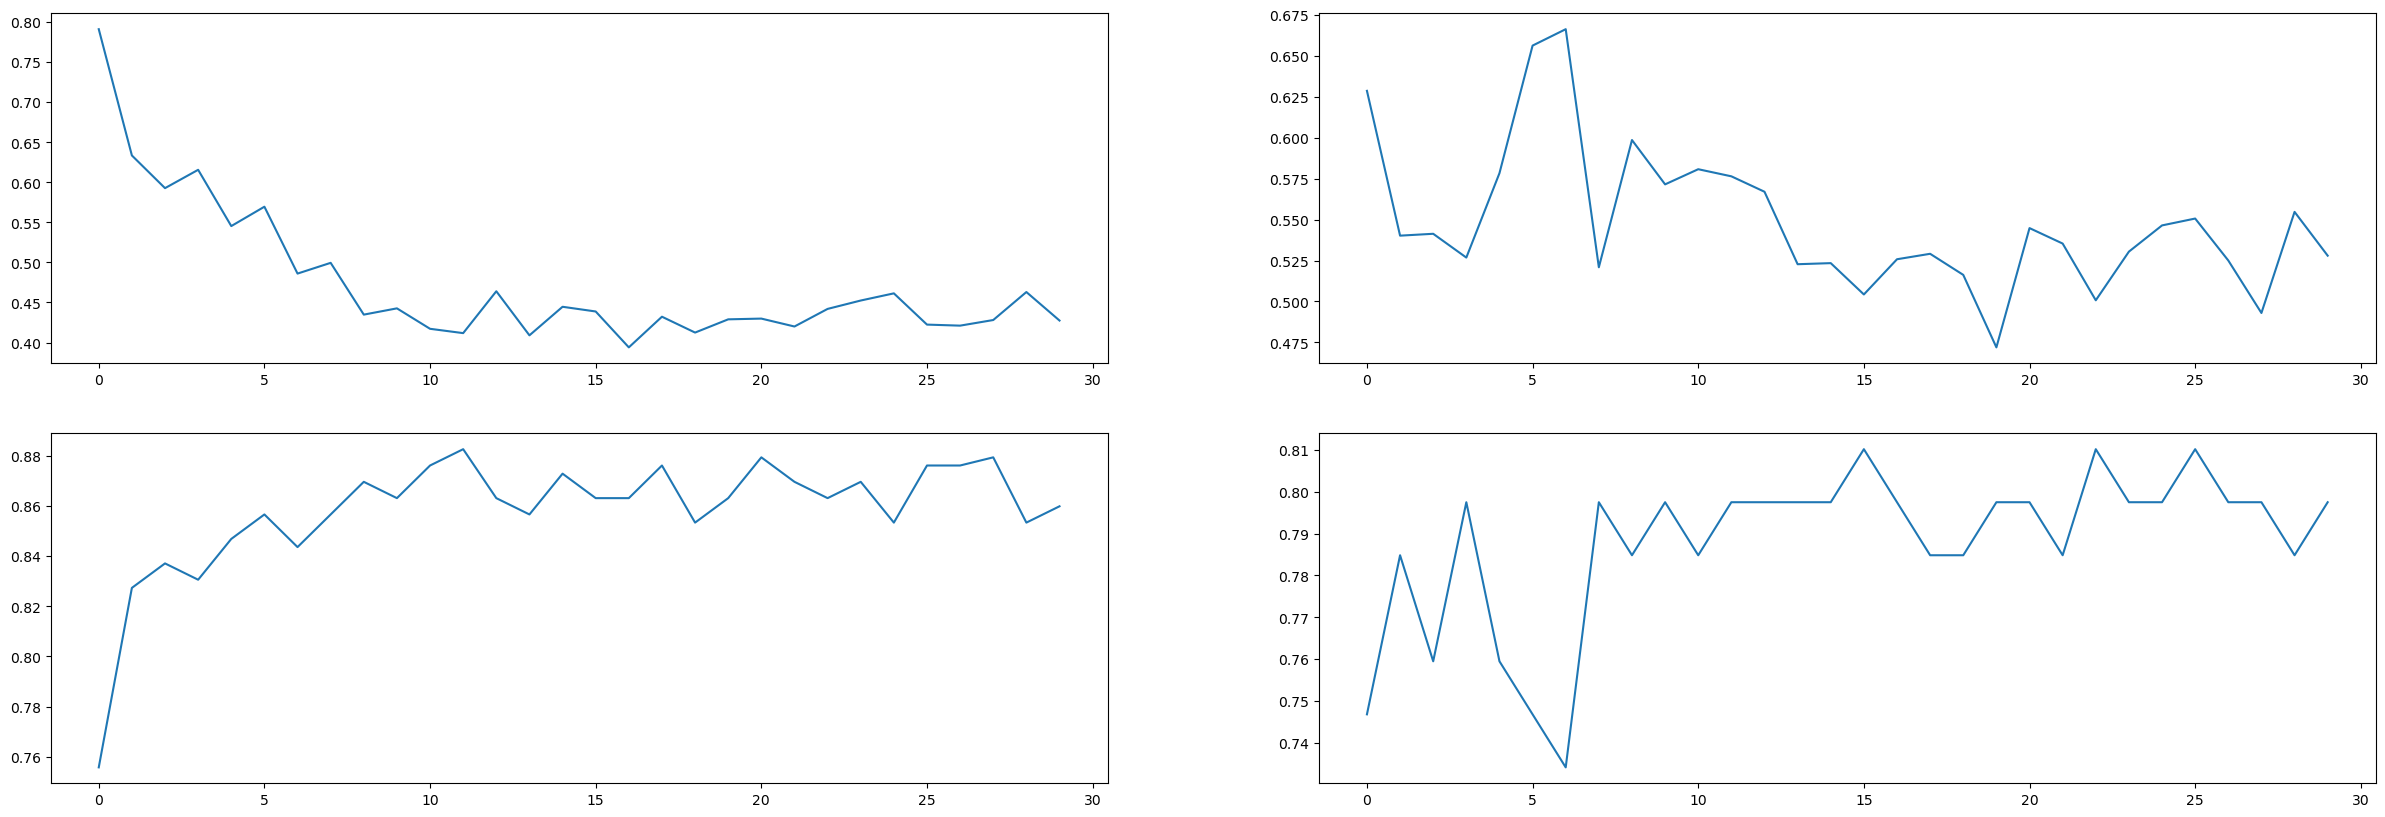

In [ ]:
tf.keras.backend.clear_session()
model, effnetv2m_fine_tune_history = Model_Training.main(    
    'efficientnetv2m',
    train,
    val,
    epochs=100,
    patience=2,
    Earlystop=10,
    augmentation = True,
    trainable_layers = -1,flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'Fine_Tune_2.csv',
    load_weights = weights+'Fine_Tune/best_model',
    save_weights = weights+'Fine_Tune_2/best_model',
    learning_rate=1e-5,init_lr=1e-6,warmup=0,cosine=40,
    optimiser=tf.keras.optimizers.Adam(),class_weight=class_weight,
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)
model.save_weights(weights+'Final_2/Final_2')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 efficientnetv2-m (Functional)  (None, 7, 7, 1280)   53150388    ['input_2[0][0]']                
                                                                                                  
 global_average_pooling2d (Glob  (None, 1280)        0           ['efficientnetv2-m[0][0]']       
 alAveragePooling2D)                                                                              
                                                                                              

2023-03-30 15:17:05.119799: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


25/25 [==============================] - 4s 48ms/step - loss: 0.4797 - categorical_accuracy: 0.7959 - precision: 0.6667 - recall: 0.6667 - auc: 0.8750


2023-03-30 15:17:08.978349: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


25/25 [==============================] - 3s 46ms/step


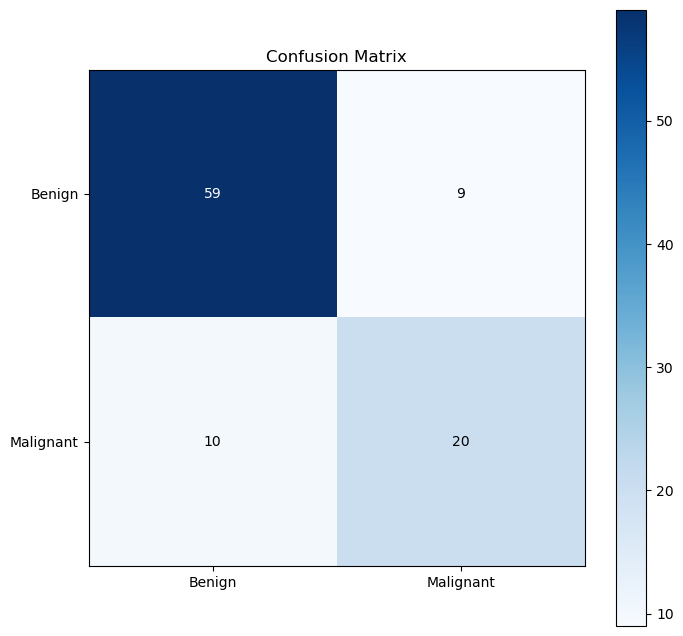

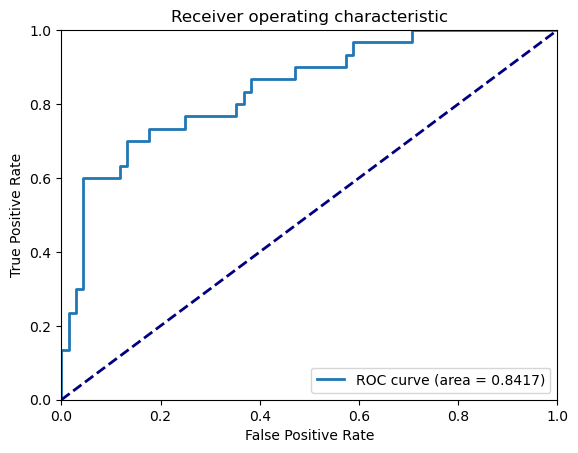

In [19]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('efficientnetv2m',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Final_2/Final_2',metrics=metric,img_width=img_width,img_height=img_height)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
tf.keras.backend.clear_session()